<a href="https://colab.research.google.com/github/Chrisagboile/AI/blob/main/MAGICDATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).

In [3]:
pd.read_csv("magic04.data")

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

inserting column heads and displaying only 5 rows

In [4]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

let us find the exiting classes

In [5]:
df['class'].unique()

array(['g', 'h'], dtype=object)

lets convert them to 0 or 1

In [6]:
df["class"]=(df["class"] == "g").astype(int)

In [7]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

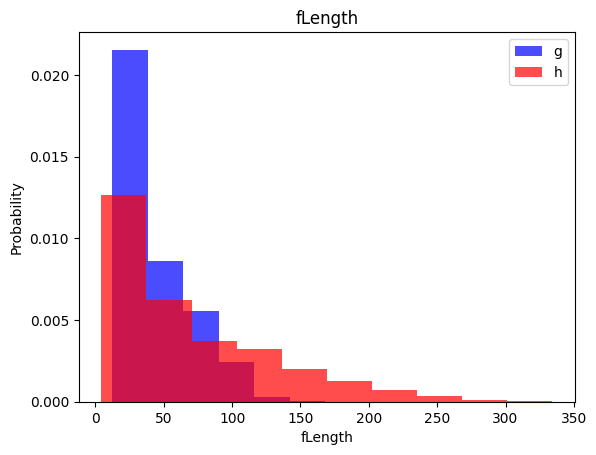

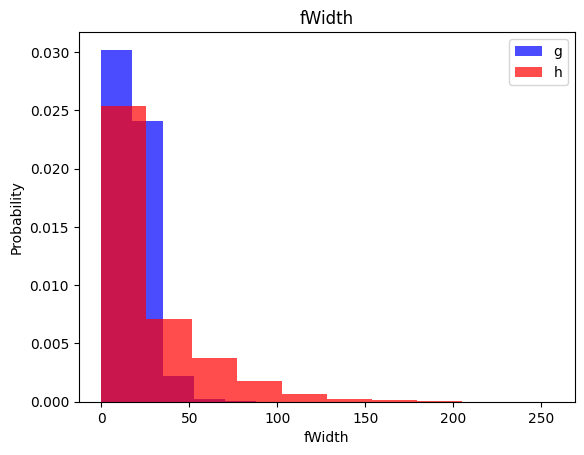

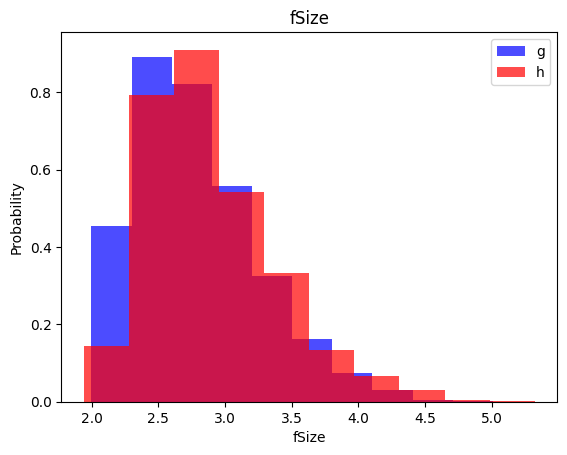

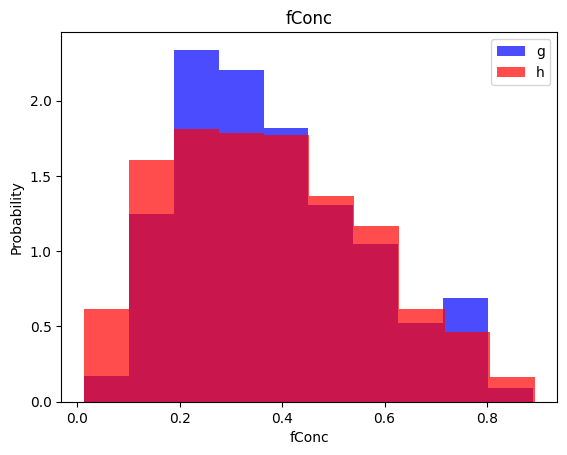

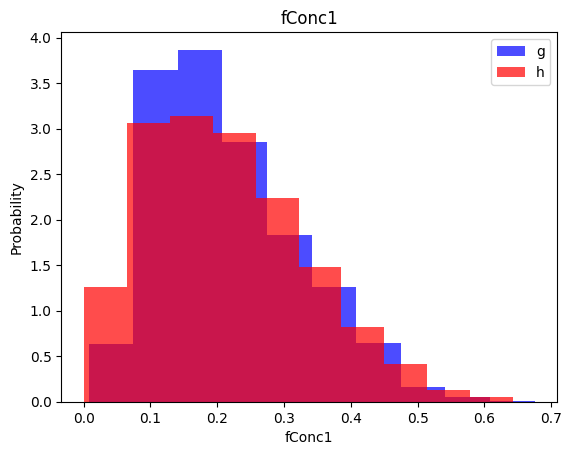

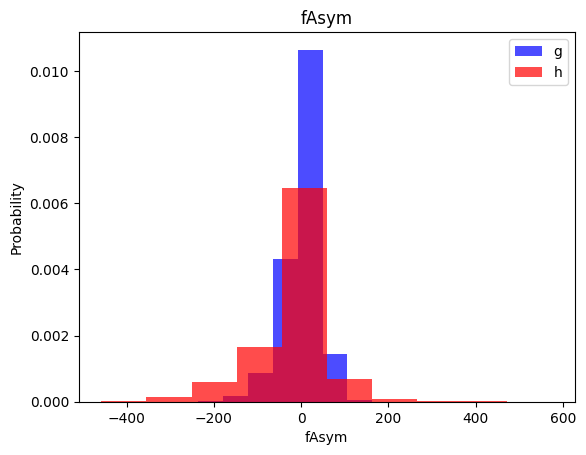

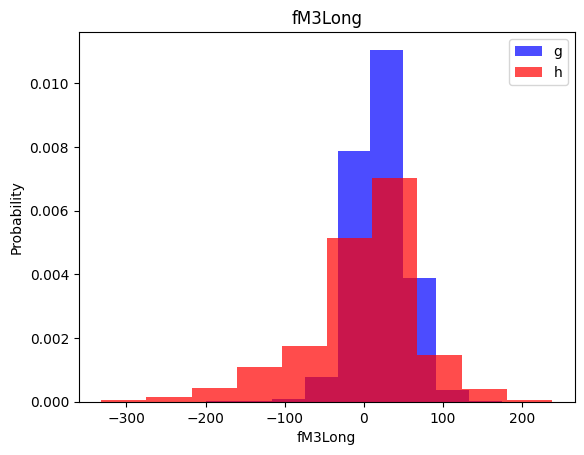

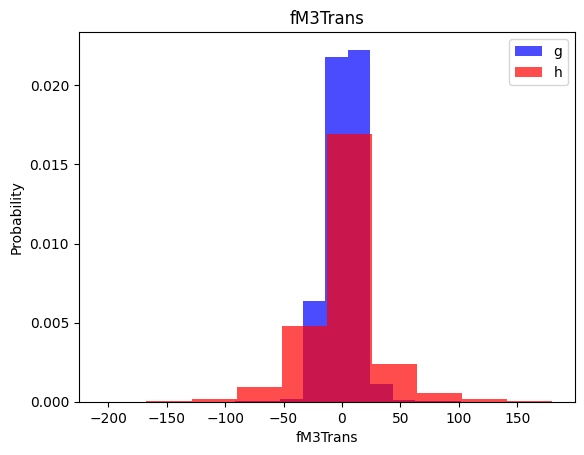

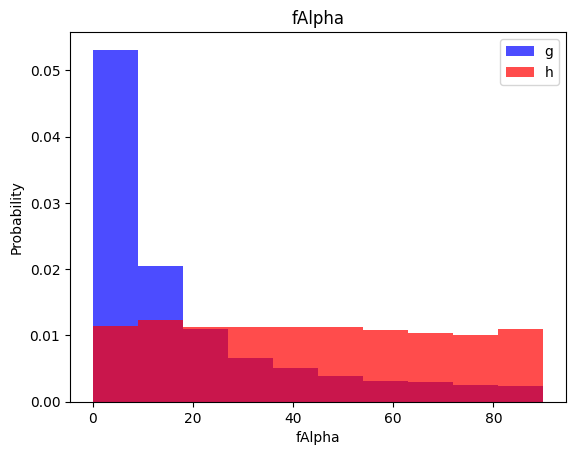

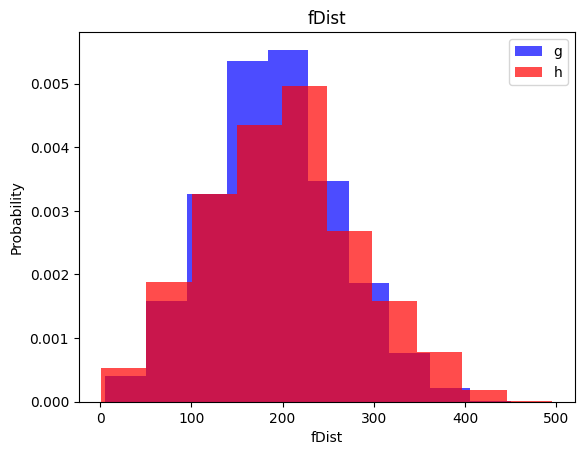

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1 ][label], color='blue', label='g', alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0 ][label], color='red', label='h', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train, Validate, Test datasets

In [29]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

its often good to scale decimal values

In [20]:
def scale_dataset(dataframe):
  X=dataframe[dataframe.cols[:-1]].values
  y=dataframe[dataframe.cols[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [21]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #h

7409
4003


there is large difference between gamma and h
so let us oversample to bridge the gap

In [22]:
def scale_dataset(dataframe, oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros= RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y

In [23]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [24]:
len(y_train)

14818

In [25]:
sum(y_train == 1)

np.int64(7409)

In [26]:
sum(y_train == 0)

np.int64(7409)

now balance

In [30]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

KNN model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred = knn_model.predict(X_test)

In [34]:
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [35]:
y_test

array([1, 1, 0, ..., 1, 1, 1])

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1333
           1       0.84      0.88      0.86      2471

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# **Naive Bayes**

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [39]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.39      0.48      1333
           1       0.73      0.88      0.80      2471

    accuracy                           0.71      3804
   macro avg       0.68      0.63      0.64      3804
weighted avg       0.69      0.71      0.69      3804



# **Log Regression**

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [42]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1333
           1       0.84      0.81      0.82      2471

    accuracy                           0.78      3804
   macro avg       0.75      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# **SVM**

In [43]:
from sklearn.svm import SVC

In [44]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [45]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1333
           1       0.89      0.89      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# **Neural Network**

In [46]:
import tensorflow as tf

In [47]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [49]:
nn_model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape=(10,) ),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])
nn_model.compile(optimizer= tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
) # verbose=0 can be used to silent the training message being printed out

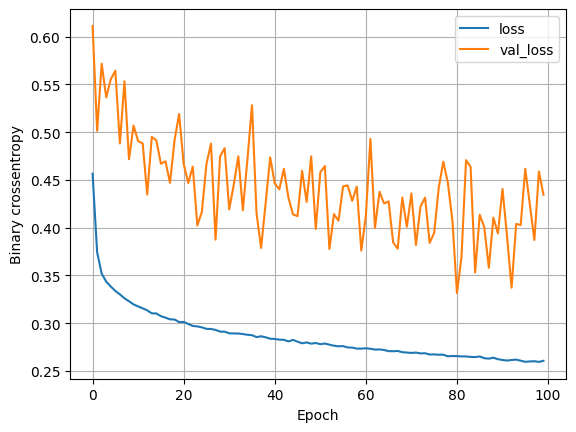

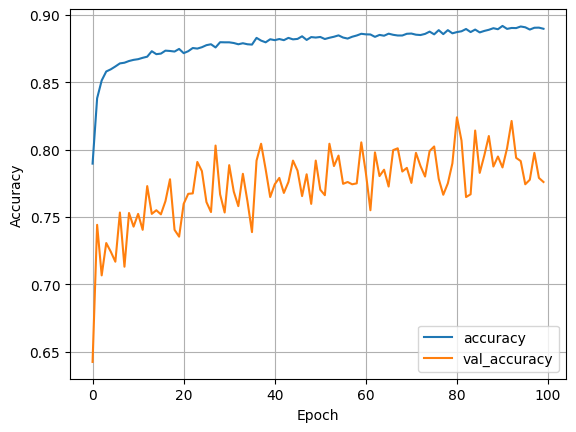

In [51]:
plot_loss(history)
plot_accuracy(history)

Lets perimterize it

In [53]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

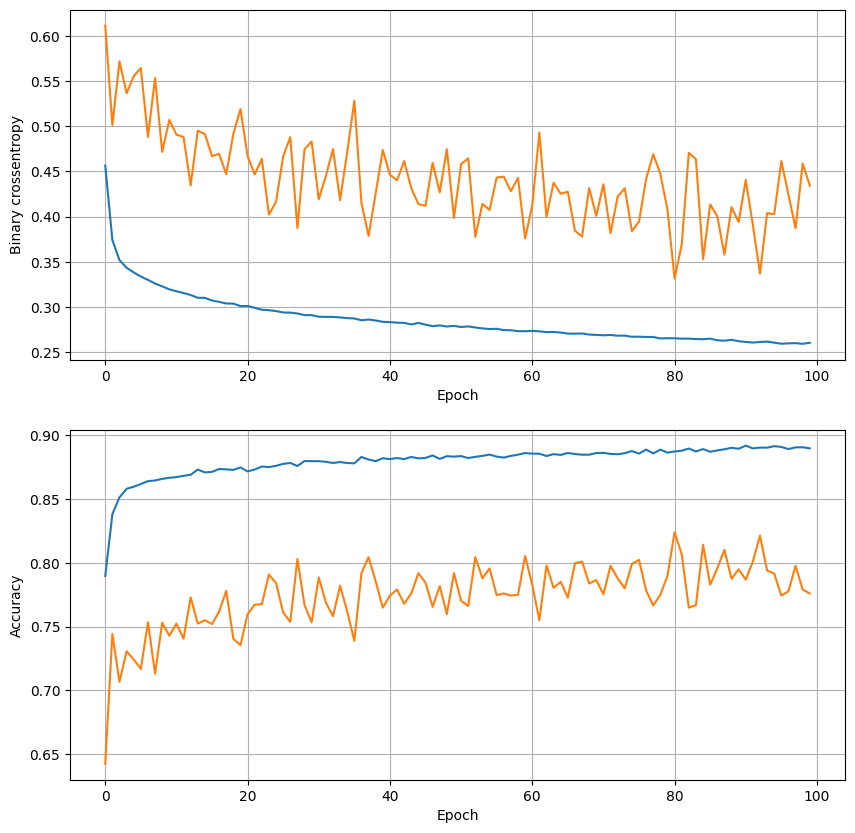

In [54]:
plot_history(history)

In [55]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
     tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,) ),
     tf.keras.layers.Dropout(dropout_prob),
     tf.keras.layers.Dense(num_nodes, activation='relu'),
     tf.keras.layers.Dropout(dropout_prob),
     tf.keras.layers.Dense(1, activation='sigmoid')
     ])
  nn_model.compile(optimizer= tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


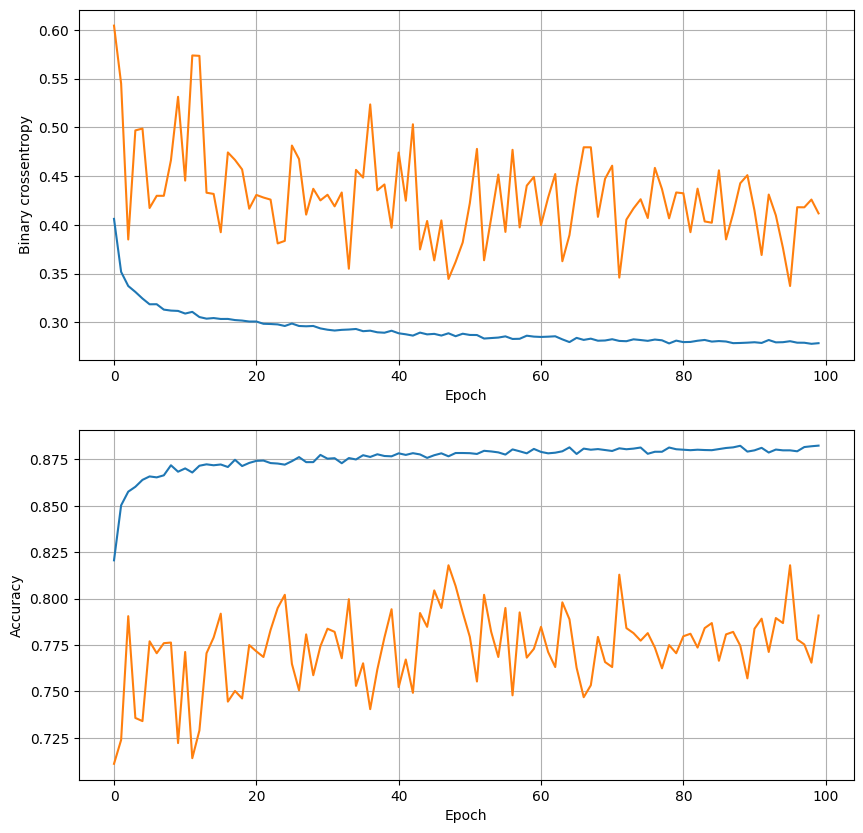

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.3543
16 nodes, dropout 0, lr 0.01, batch size 64


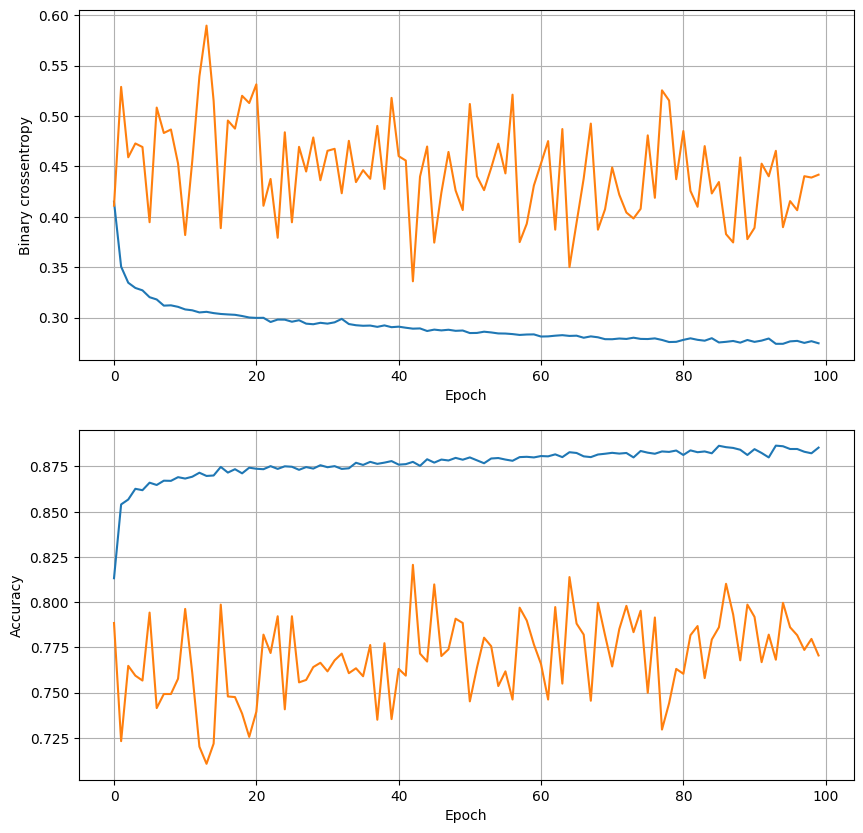

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3413
16 nodes, dropout 0, lr 0.01, batch size 128


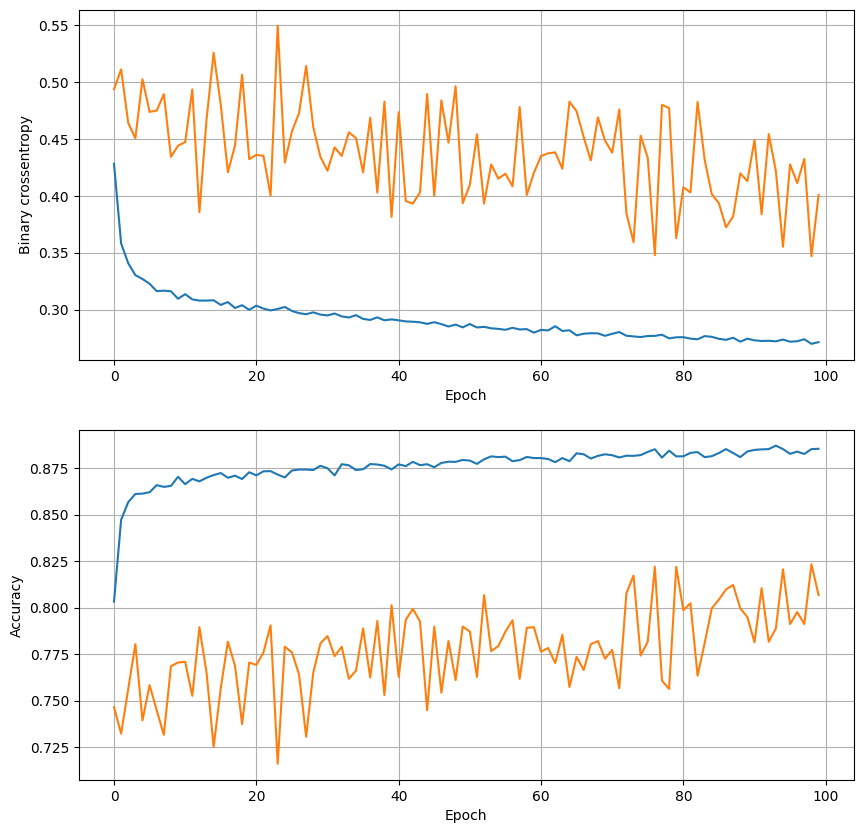

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3539
16 nodes, dropout 0, lr 0.005, batch size 32


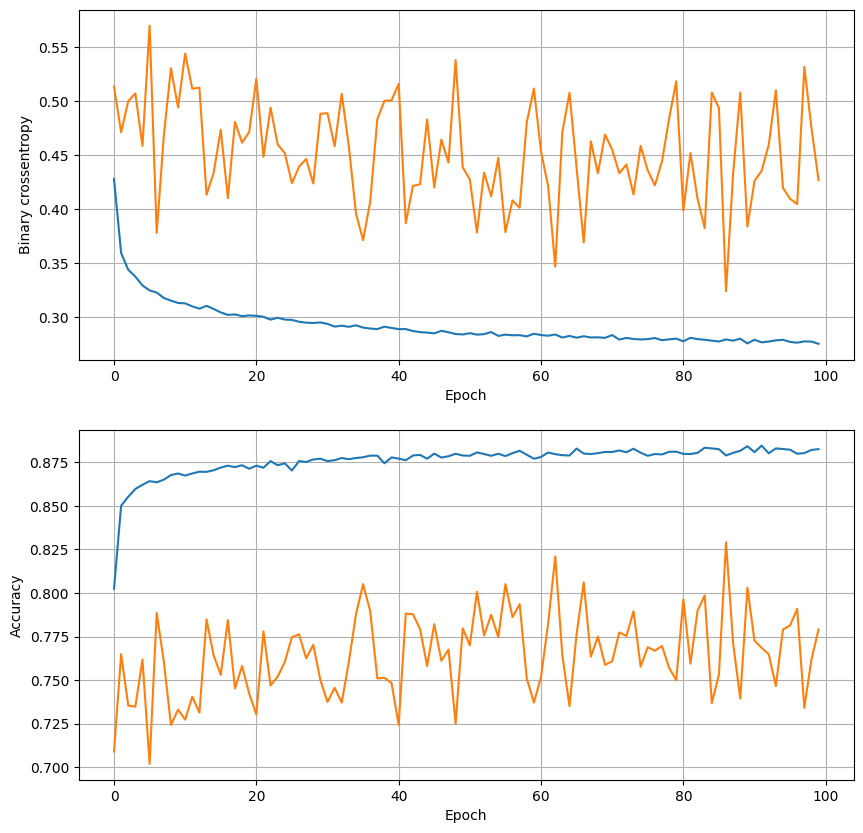

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3525
16 nodes, dropout 0, lr 0.005, batch size 64


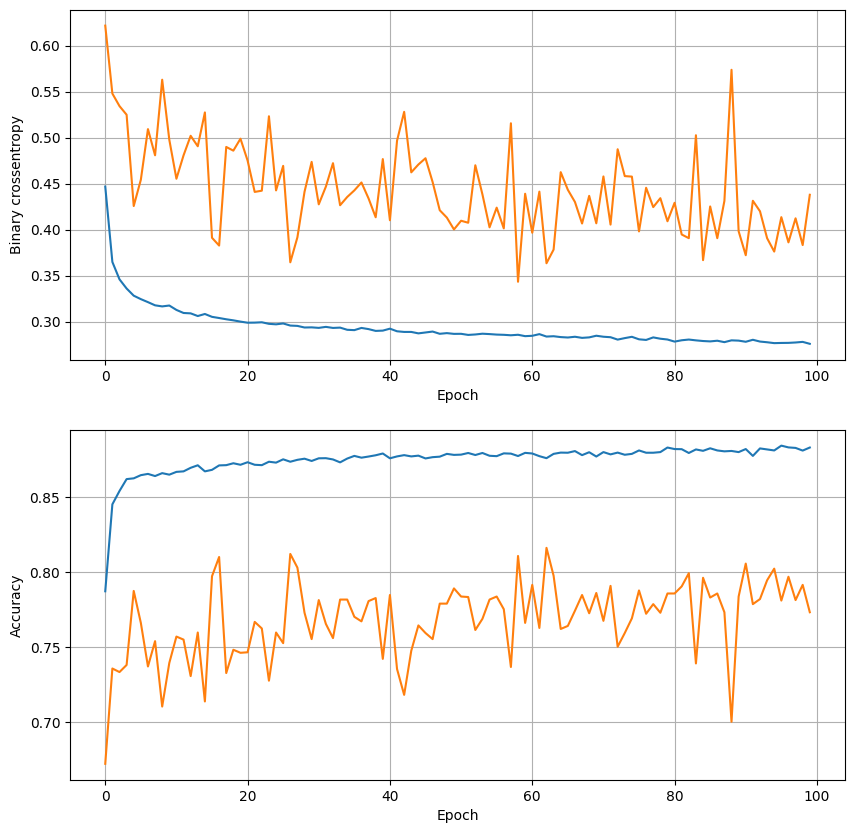

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8692 - loss: 0.3298
16 nodes, dropout 0, lr 0.005, batch size 128


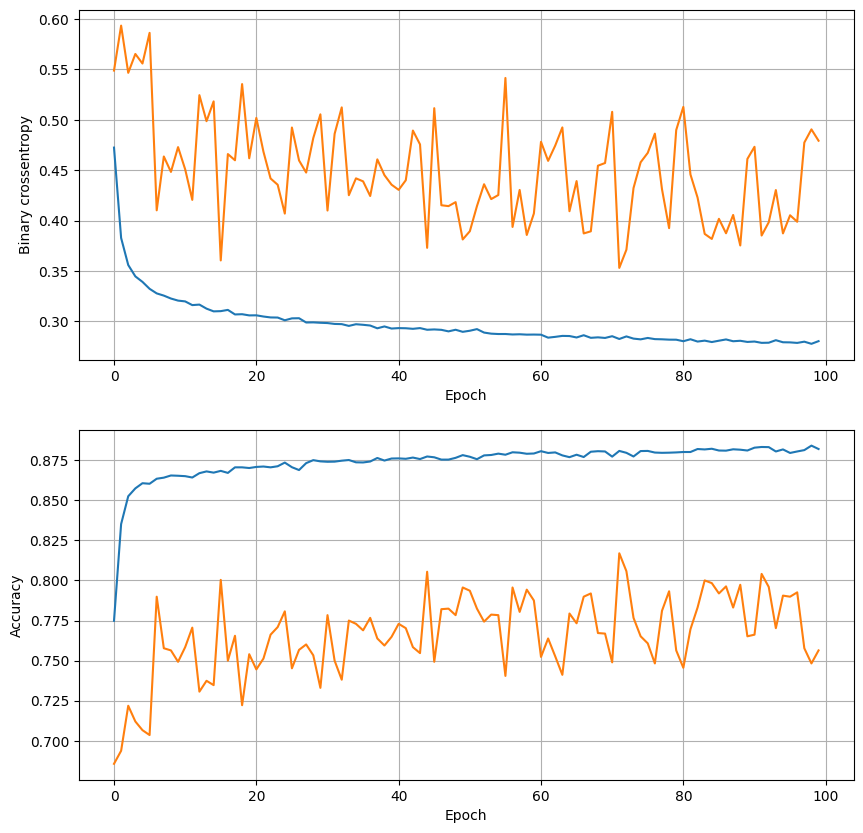

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.3167
16 nodes, dropout 0, lr 0.001, batch size 32


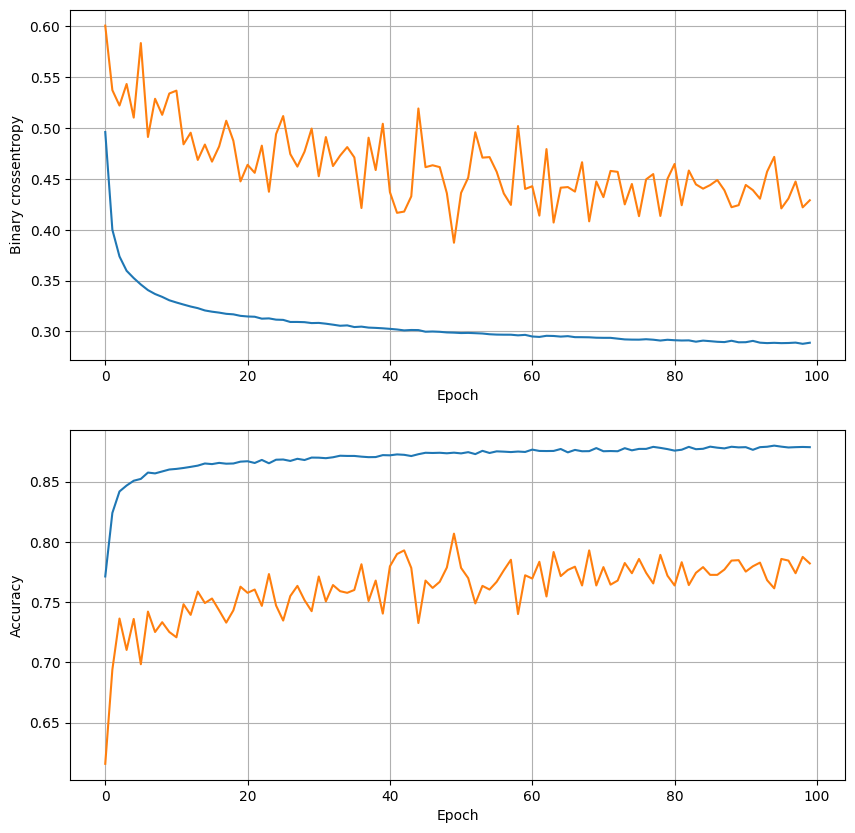

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3290
16 nodes, dropout 0, lr 0.001, batch size 64


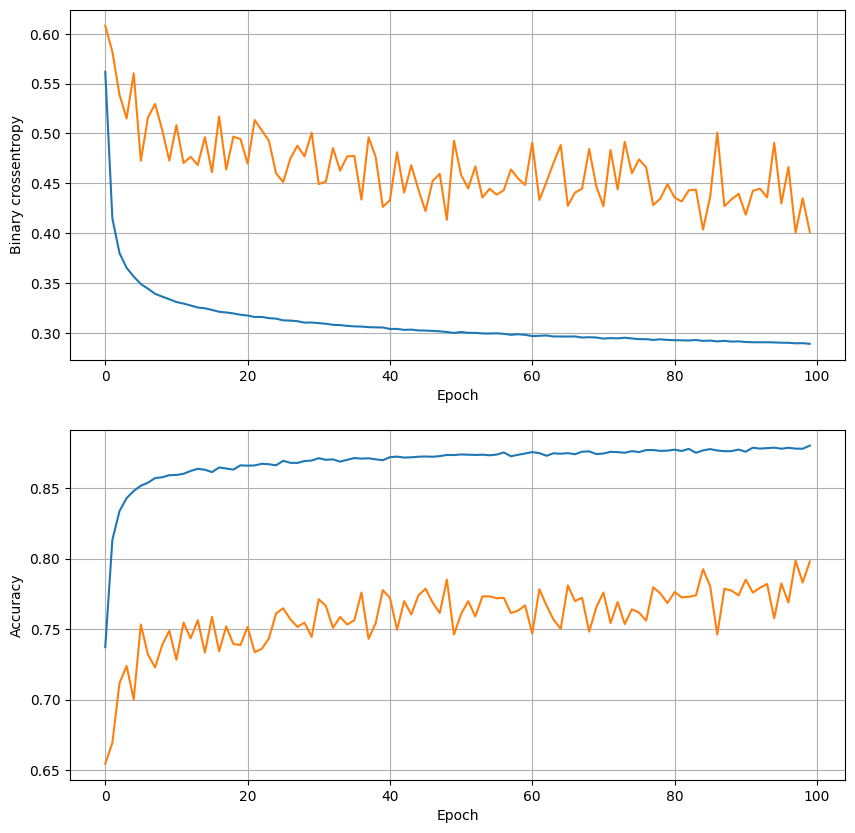

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3258
16 nodes, dropout 0, lr 0.001, batch size 128


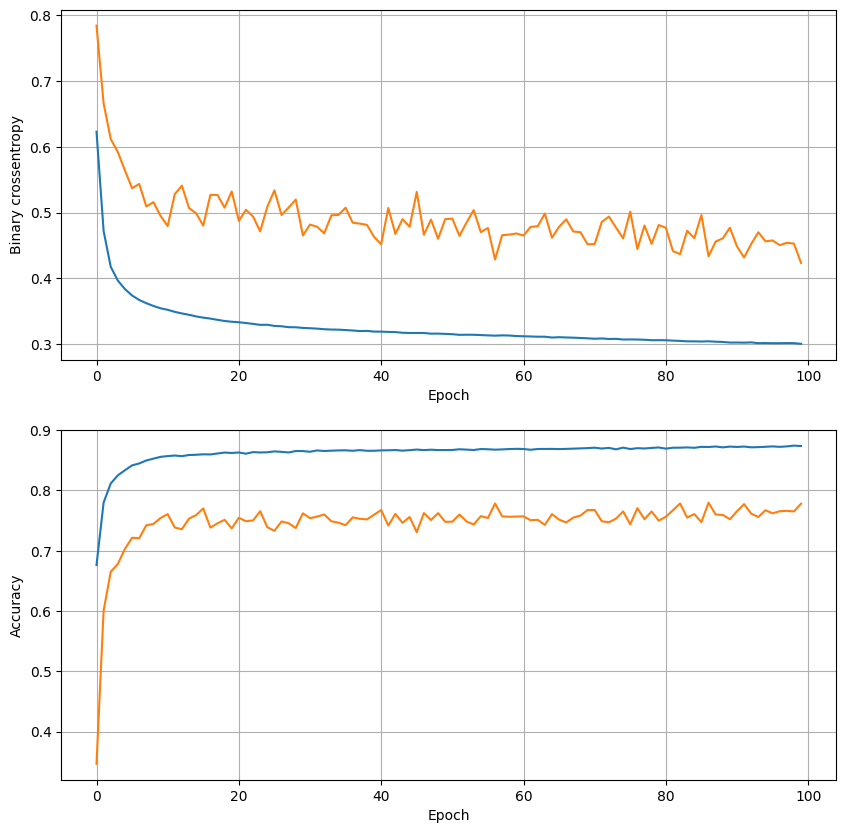

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3208
16 nodes, dropout 0.2, lr 0.01, batch size 32


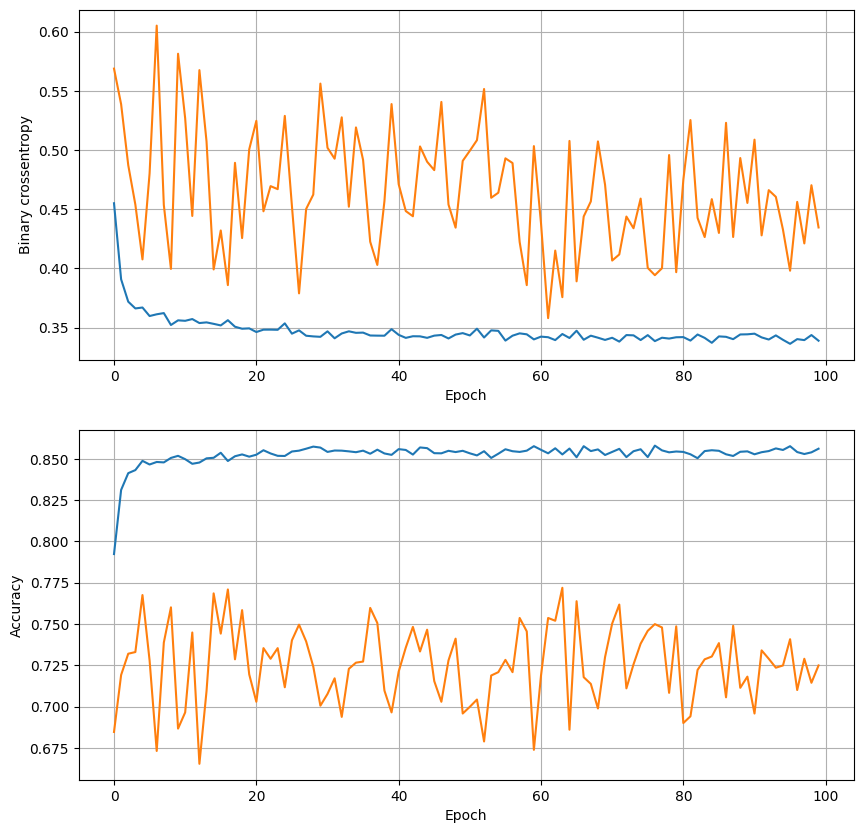

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3314
16 nodes, dropout 0.2, lr 0.01, batch size 64


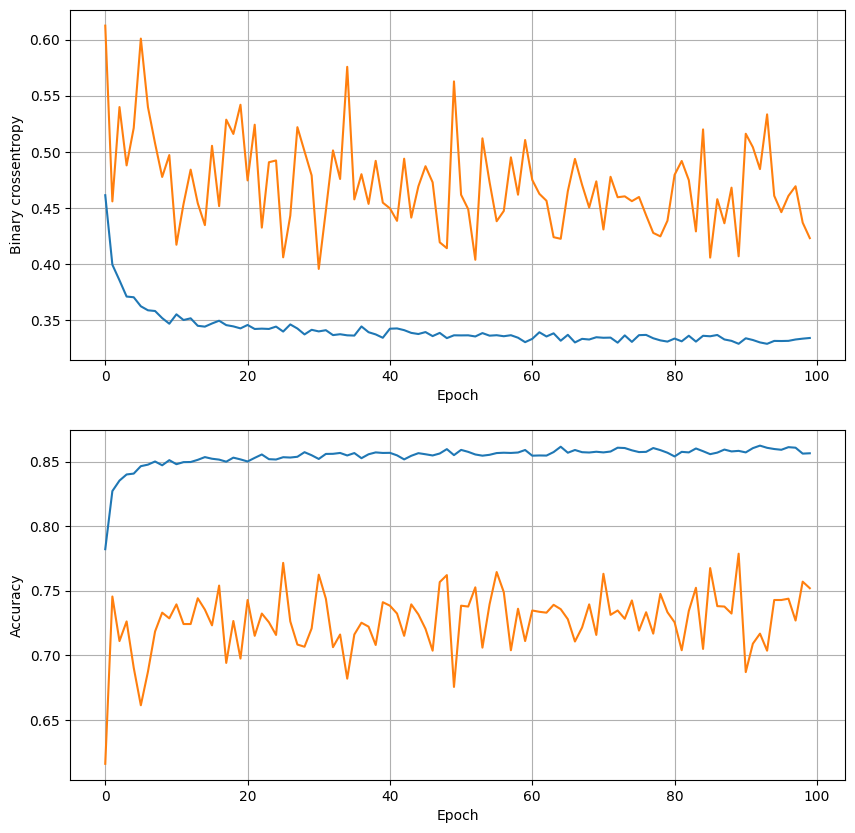

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3320
16 nodes, dropout 0.2, lr 0.01, batch size 128


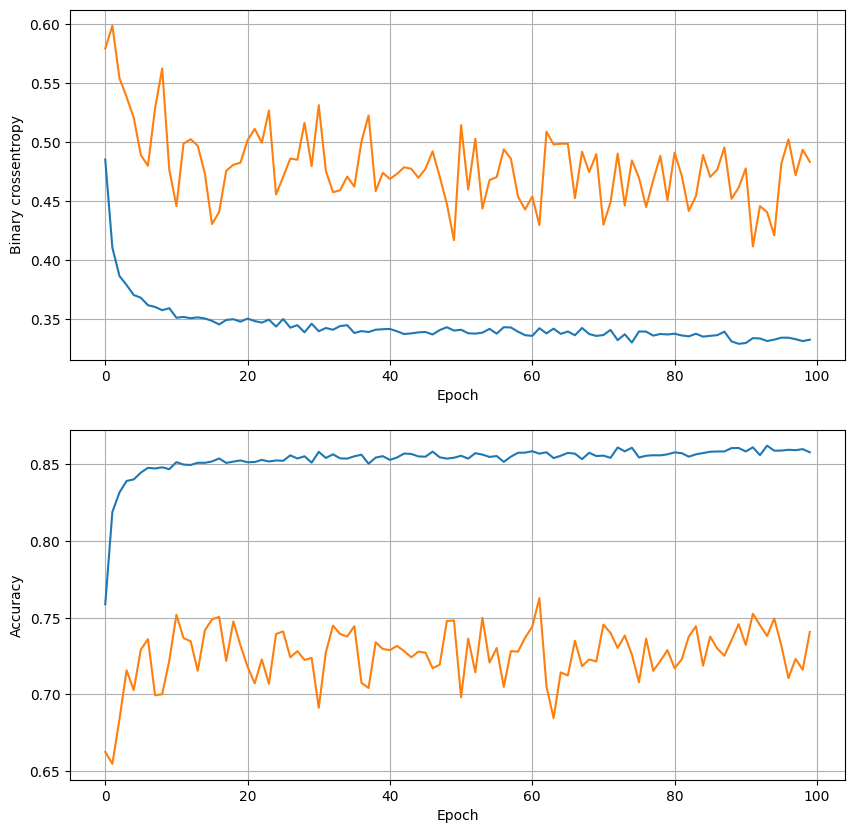

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8677 - loss: 0.3234
16 nodes, dropout 0.2, lr 0.005, batch size 32


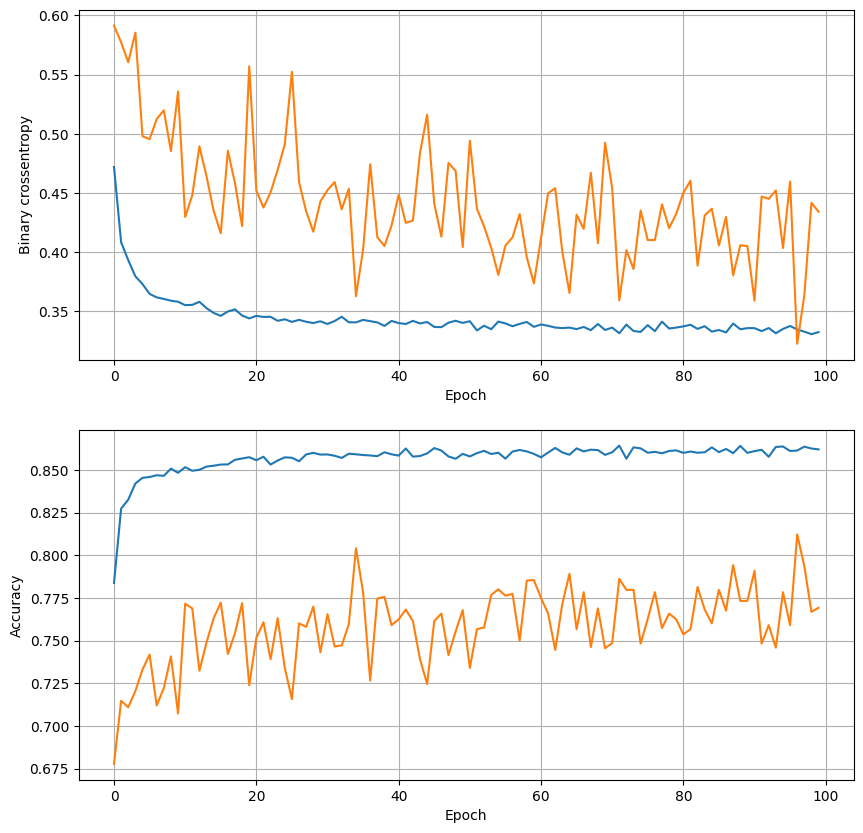

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8688 - loss: 0.3365
16 nodes, dropout 0.2, lr 0.005, batch size 64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


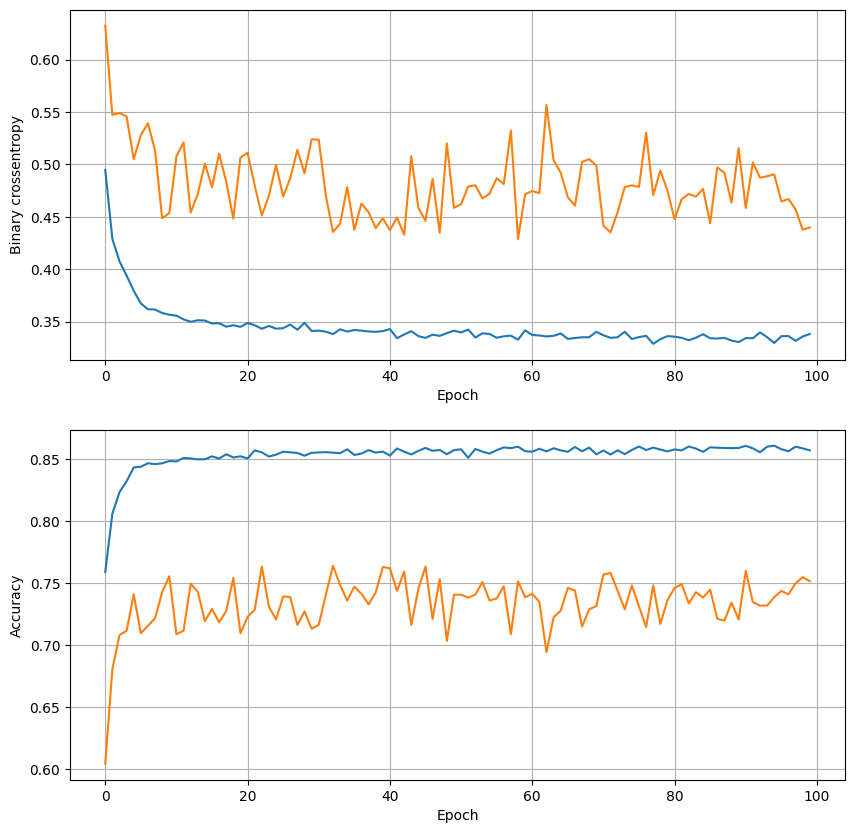

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8663 - loss: 0.3270
16 nodes, dropout 0.2, lr 0.005, batch size 128


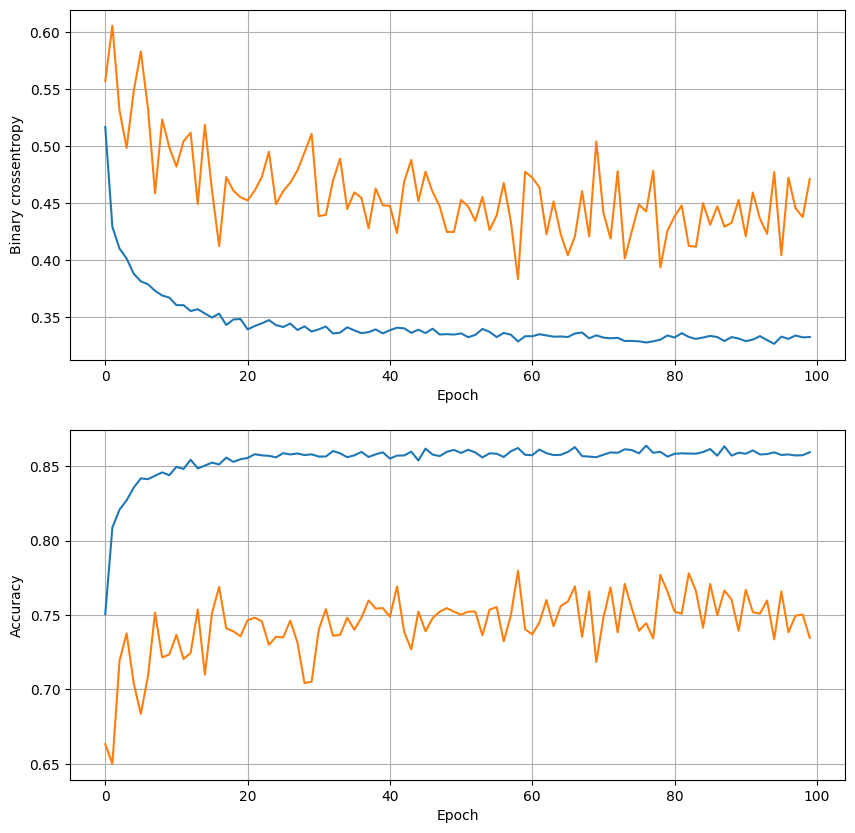

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8691 - loss: 0.3281
16 nodes, dropout 0.2, lr 0.001, batch size 32


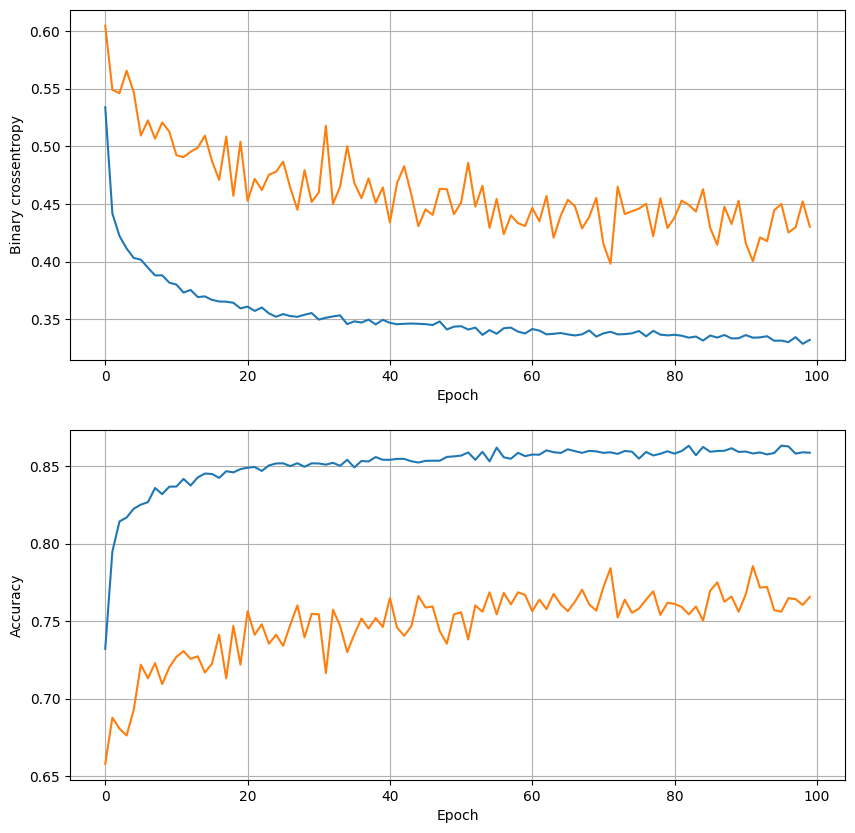

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3204
16 nodes, dropout 0.2, lr 0.001, batch size 64


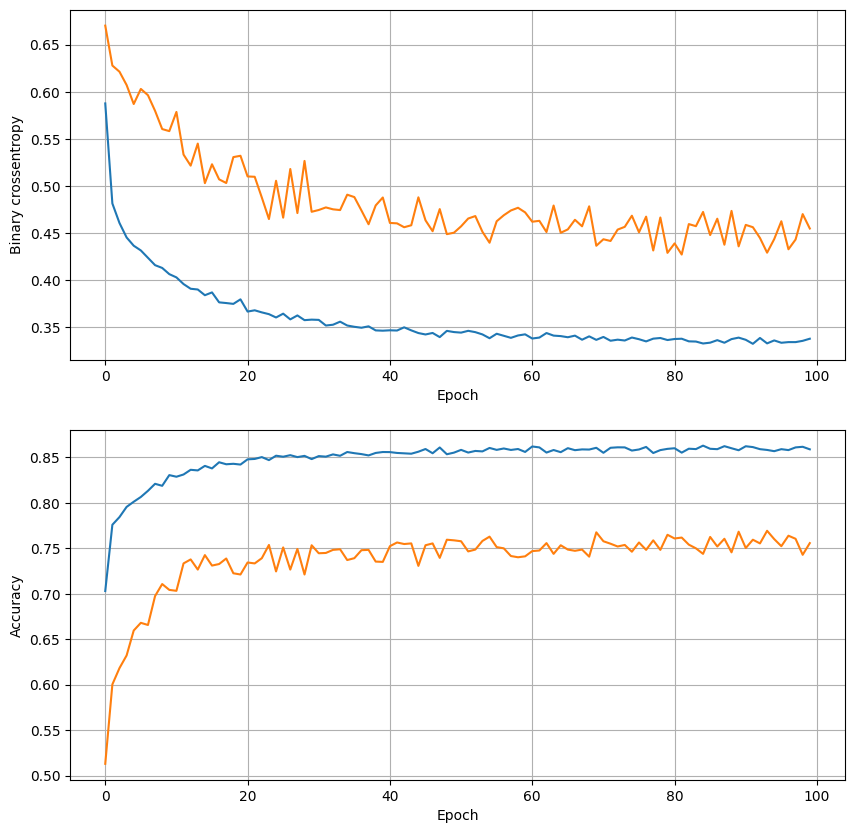

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8662 - loss: 0.3224
16 nodes, dropout 0.2, lr 0.001, batch size 128


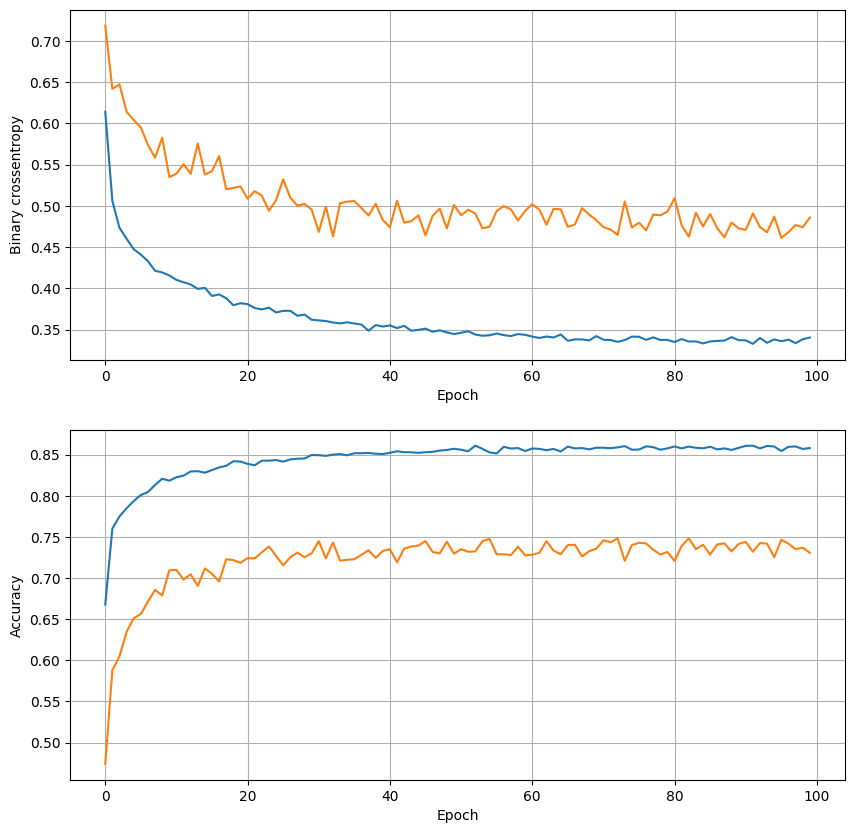

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8711 - loss: 0.3229
32 nodes, dropout 0, lr 0.01, batch size 32


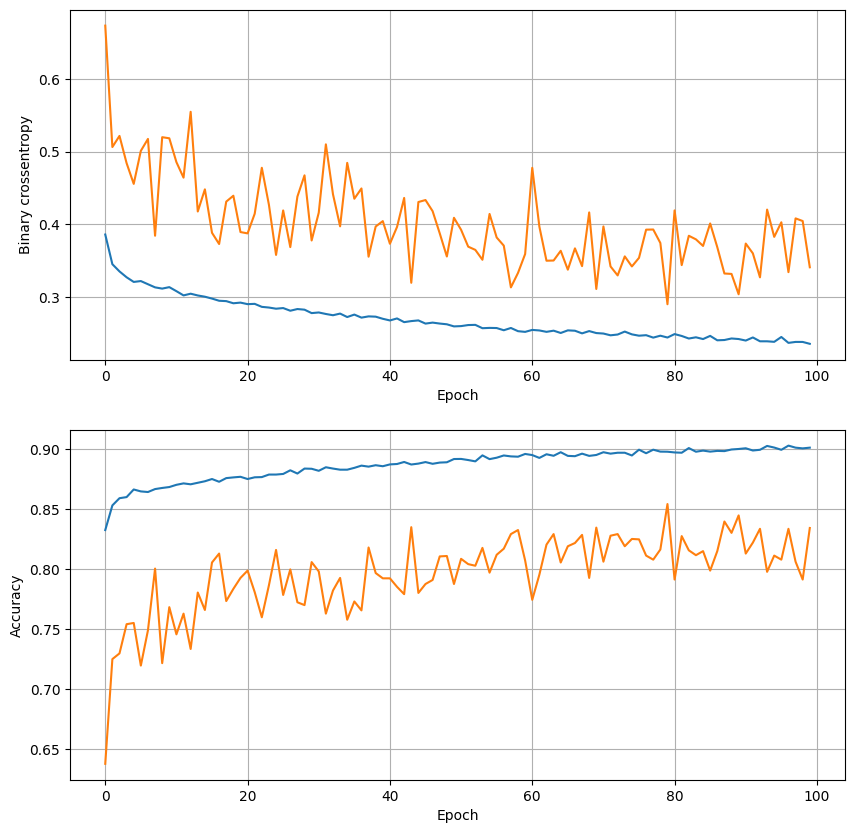

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.4388
32 nodes, dropout 0, lr 0.01, batch size 64


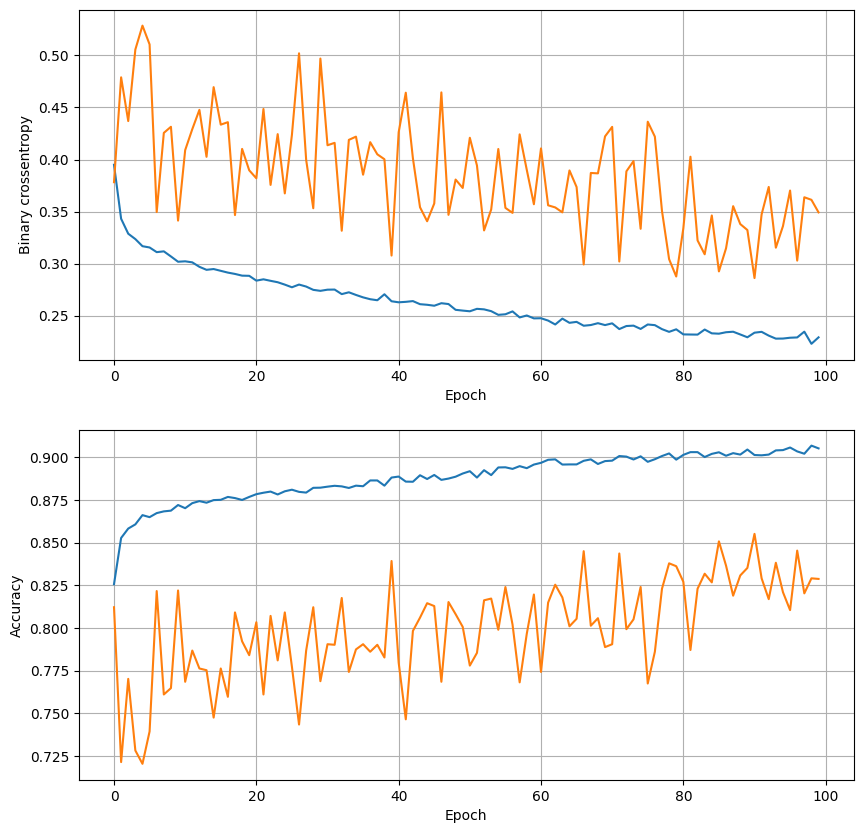

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8658 - loss: 0.4124
32 nodes, dropout 0, lr 0.01, batch size 128


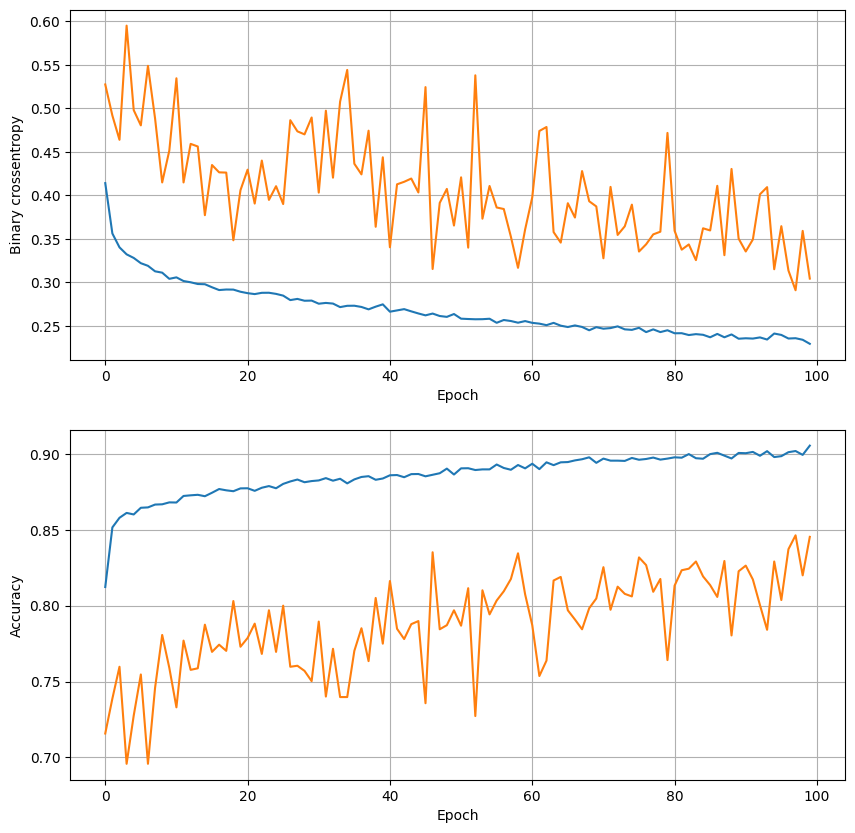

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8568 - loss: 0.4295
32 nodes, dropout 0, lr 0.005, batch size 32


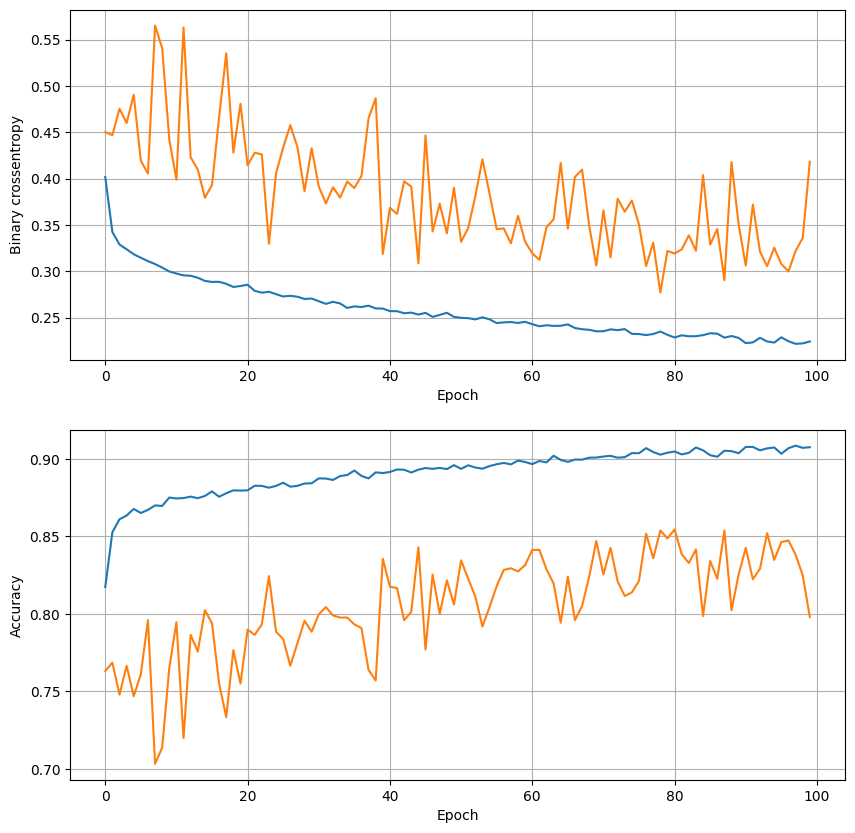

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8680 - loss: 0.4143
32 nodes, dropout 0, lr 0.005, batch size 64


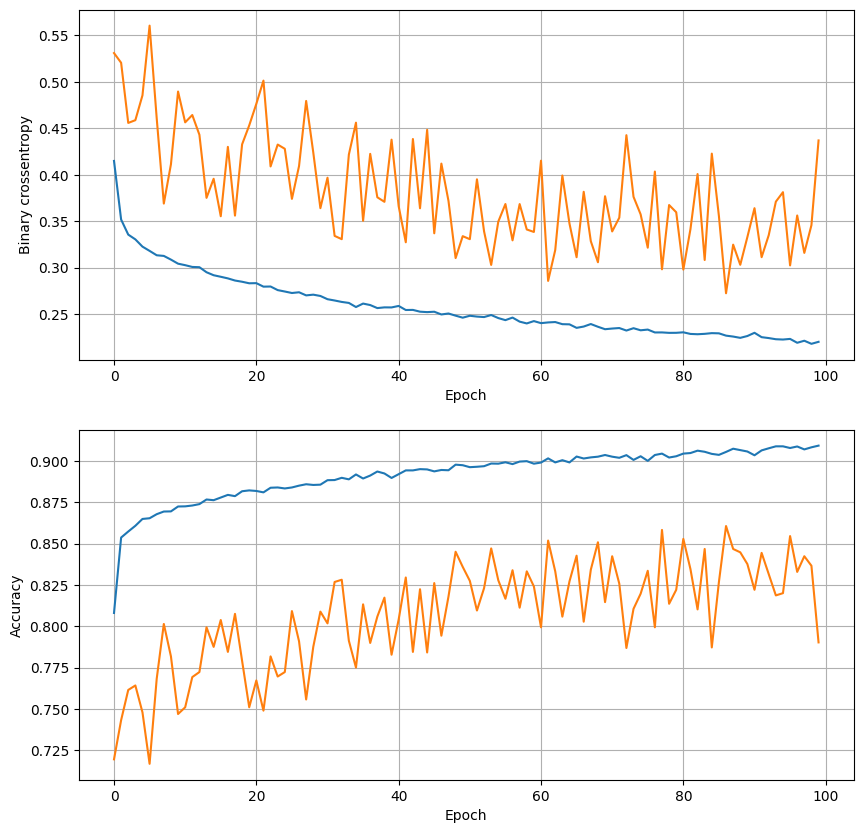

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.4025
32 nodes, dropout 0, lr 0.005, batch size 128


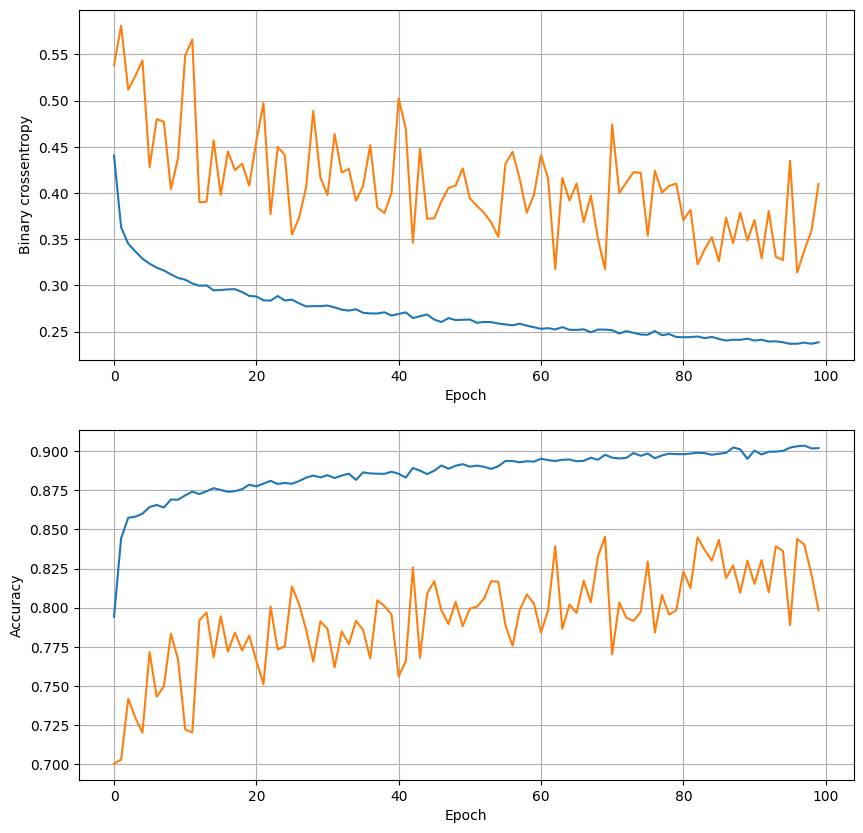

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8671 - loss: 0.3660
32 nodes, dropout 0, lr 0.001, batch size 32


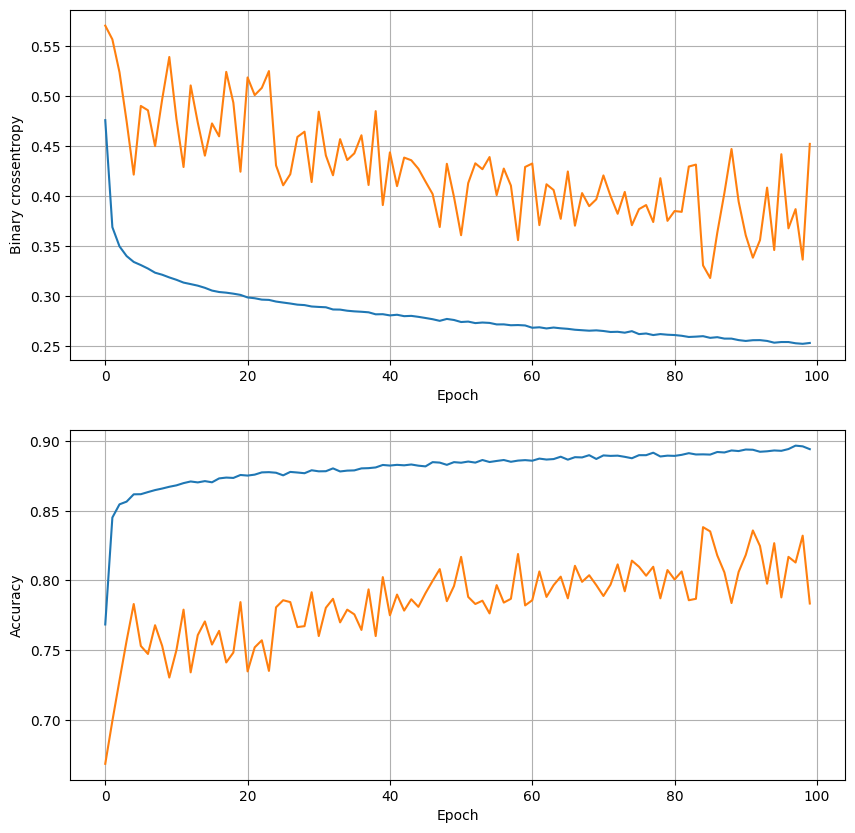

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.3345
32 nodes, dropout 0, lr 0.001, batch size 64


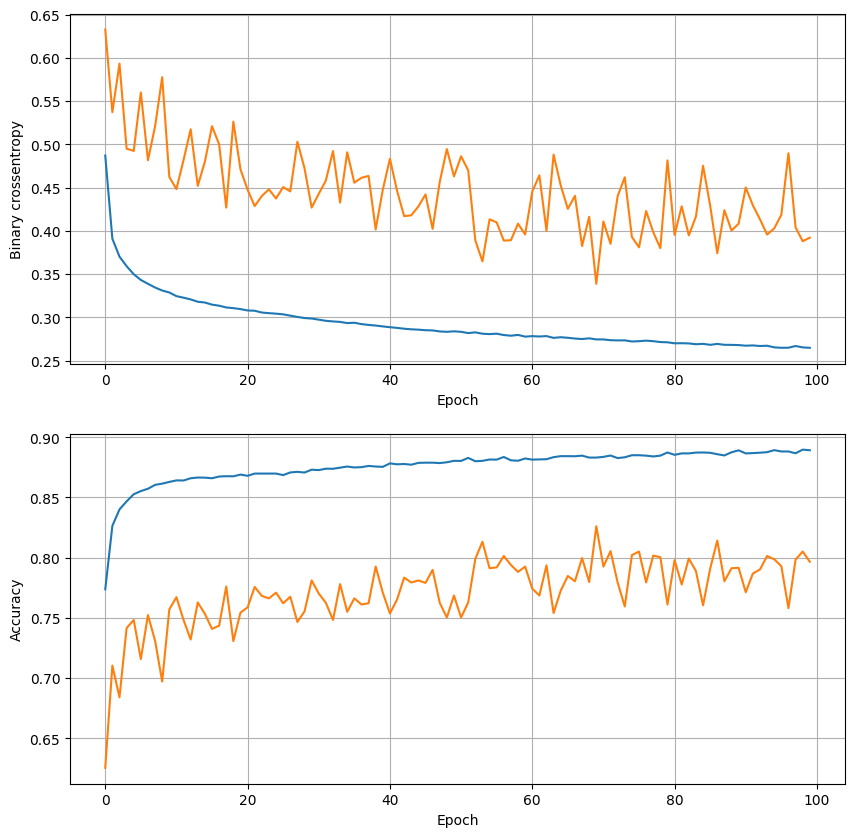

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8713 - loss: 0.3181
32 nodes, dropout 0, lr 0.001, batch size 128


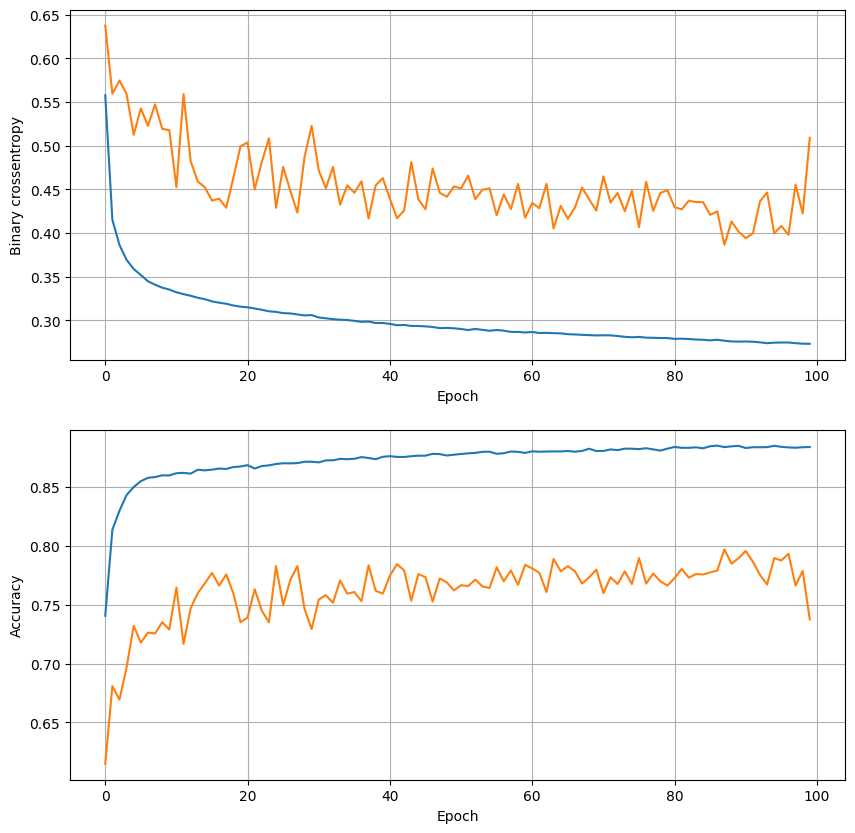

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8703 - loss: 0.3304
32 nodes, dropout 0.2, lr 0.01, batch size 32


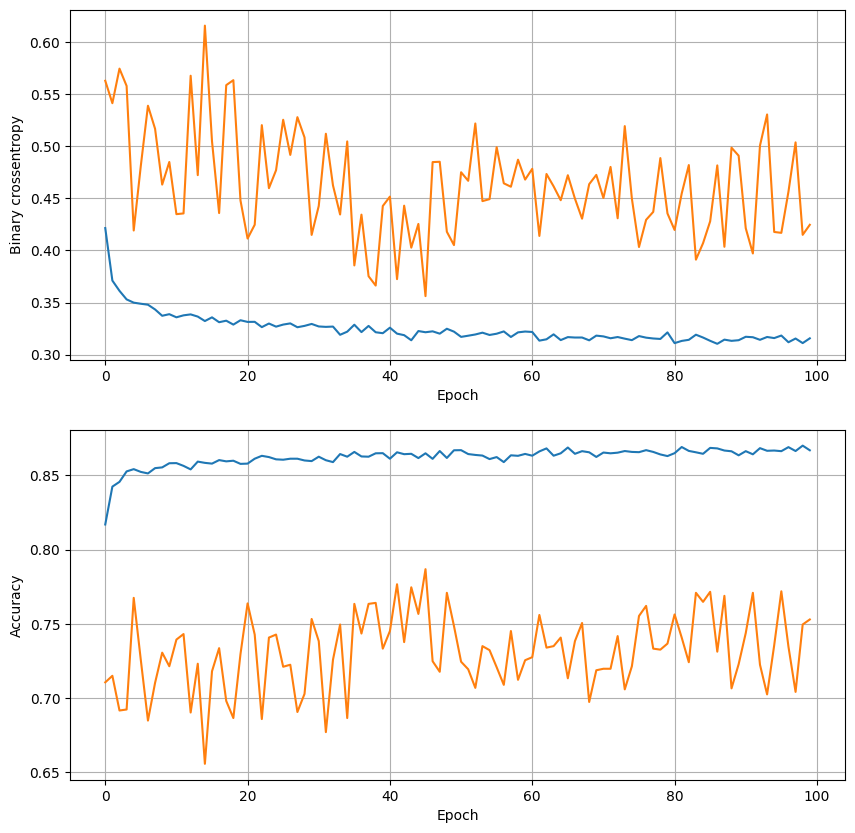

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8696 - loss: 0.3343
32 nodes, dropout 0.2, lr 0.01, batch size 64


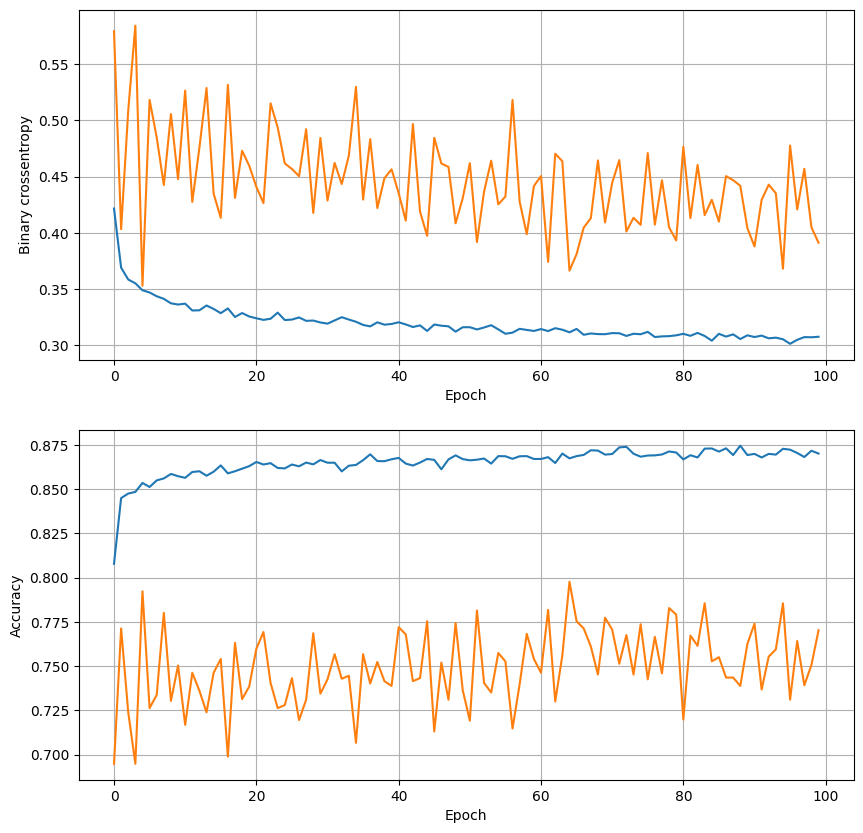

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8672 - loss: 0.3210
32 nodes, dropout 0.2, lr 0.01, batch size 128


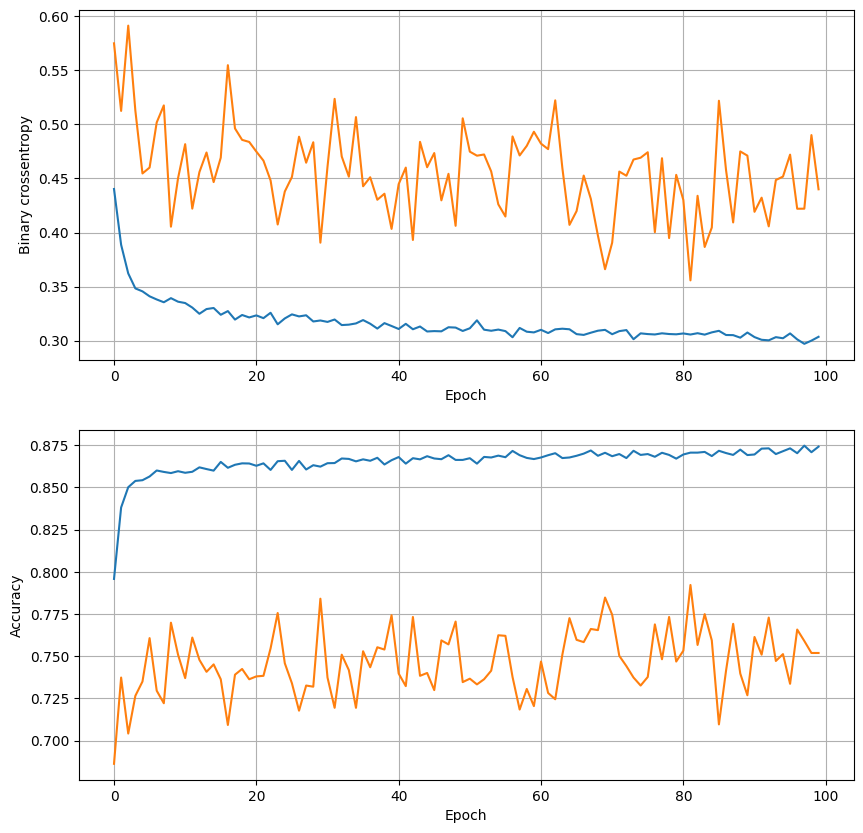

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8725 - loss: 0.3133
32 nodes, dropout 0.2, lr 0.005, batch size 32


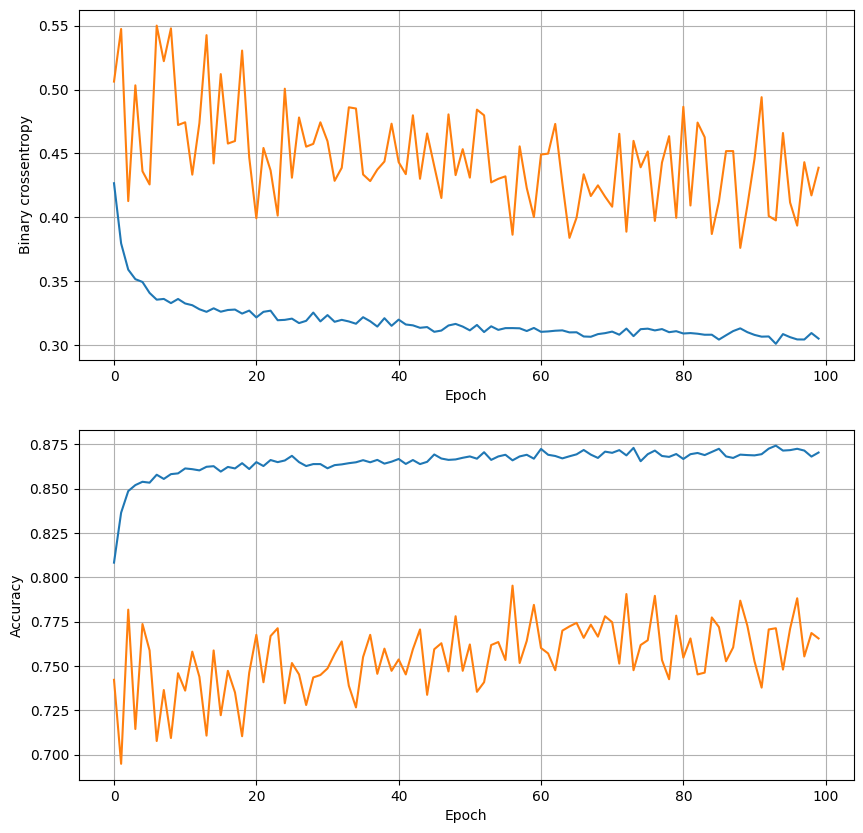

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8725 - loss: 0.3299
32 nodes, dropout 0.2, lr 0.005, batch size 64


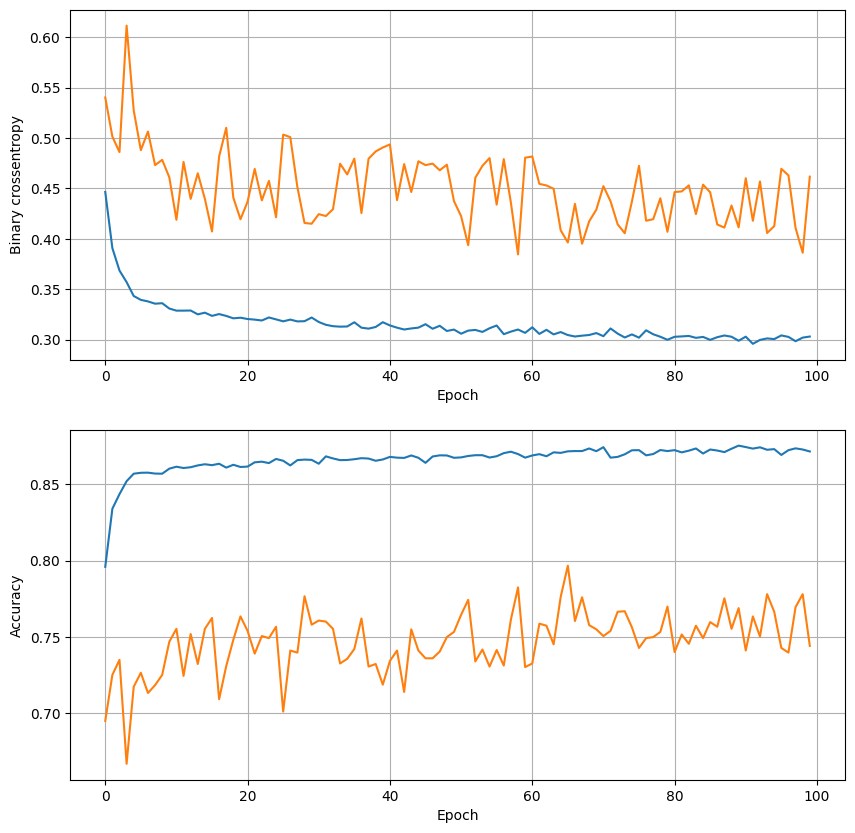

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8742 - loss: 0.3169
32 nodes, dropout 0.2, lr 0.005, batch size 128


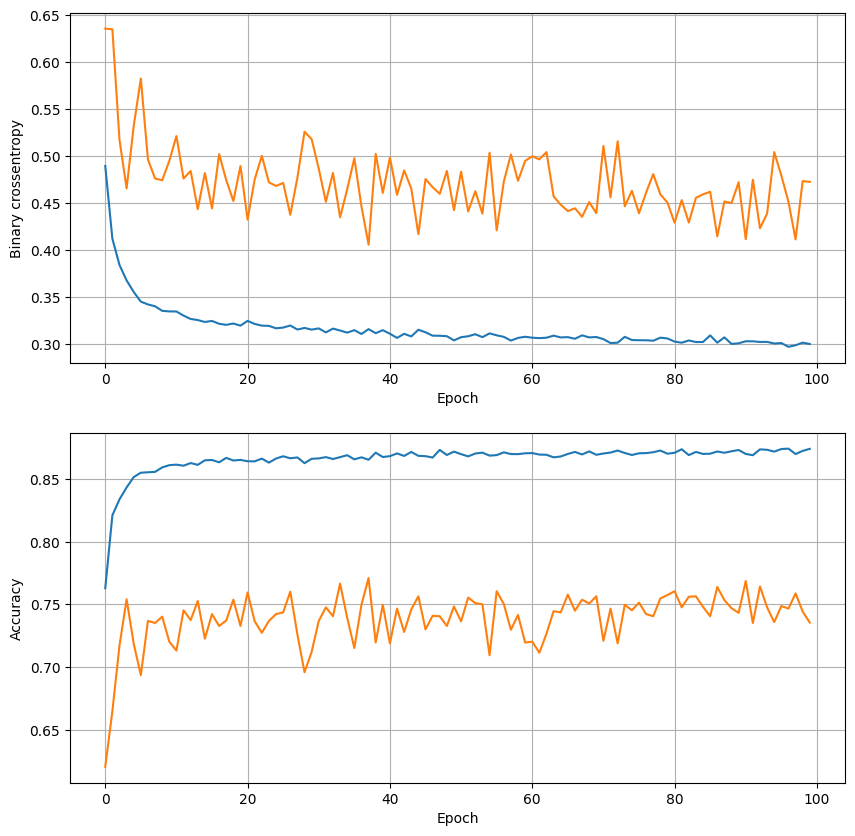

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8698 - loss: 0.3139
32 nodes, dropout 0.2, lr 0.001, batch size 32


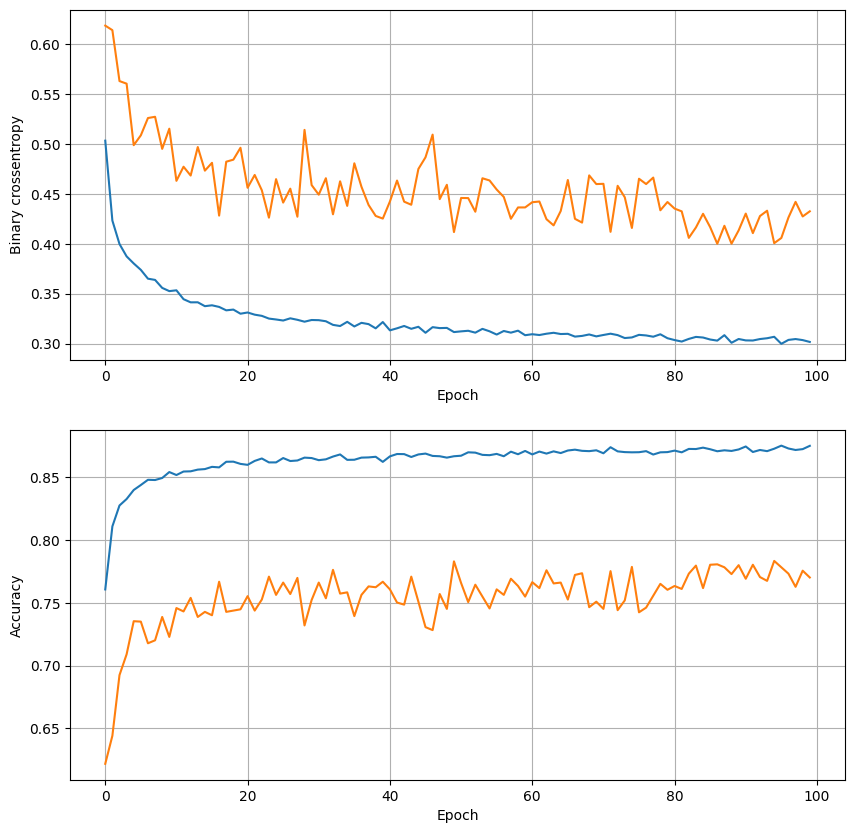

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8767 - loss: 0.3114
32 nodes, dropout 0.2, lr 0.001, batch size 64


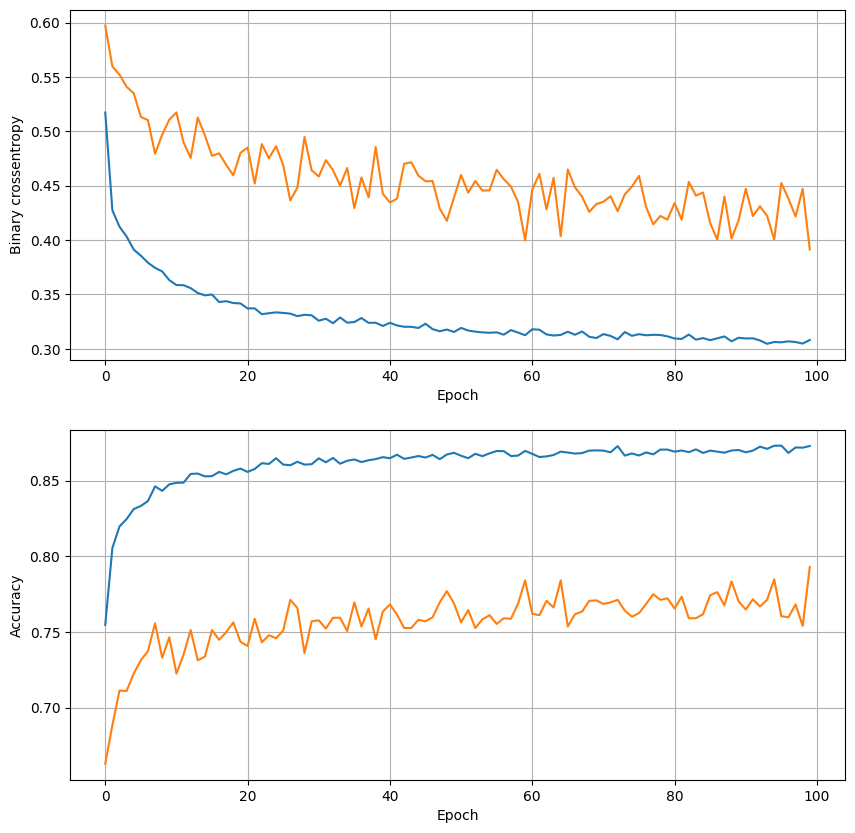

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3253
32 nodes, dropout 0.2, lr 0.001, batch size 128


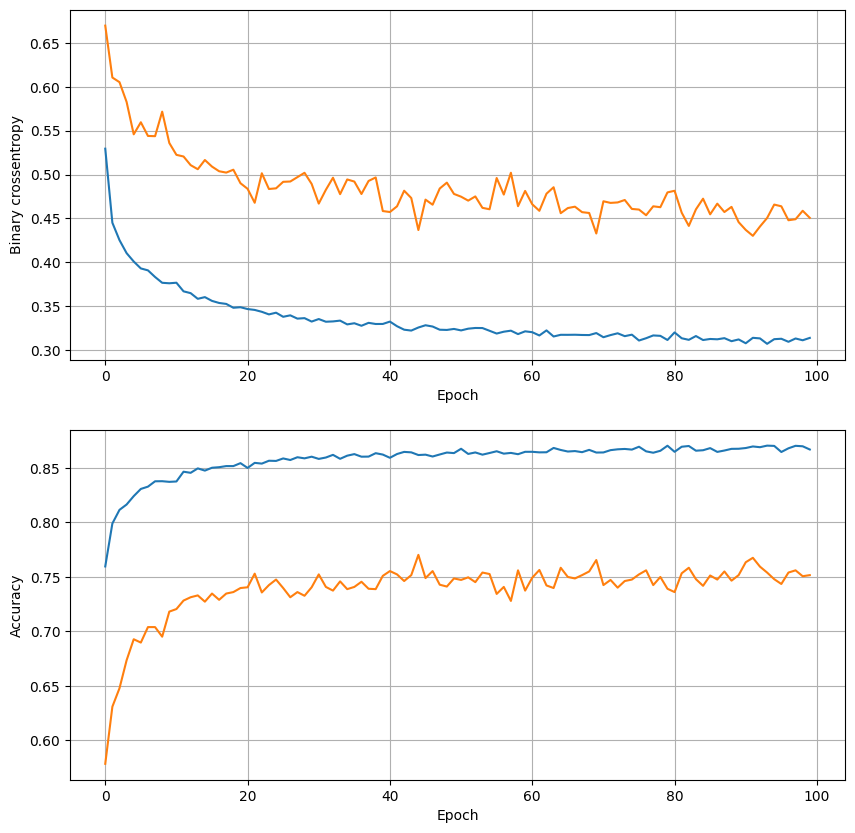

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8765 - loss: 0.3121
64 nodes, dropout 0, lr 0.01, batch size 32


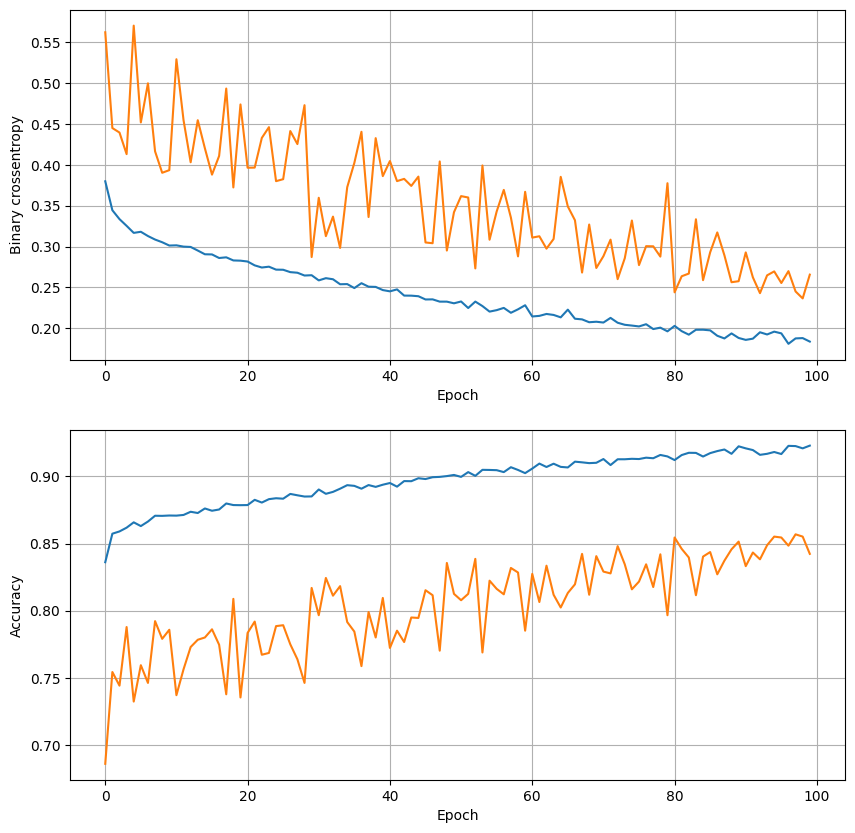

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.5530
64 nodes, dropout 0, lr 0.01, batch size 64


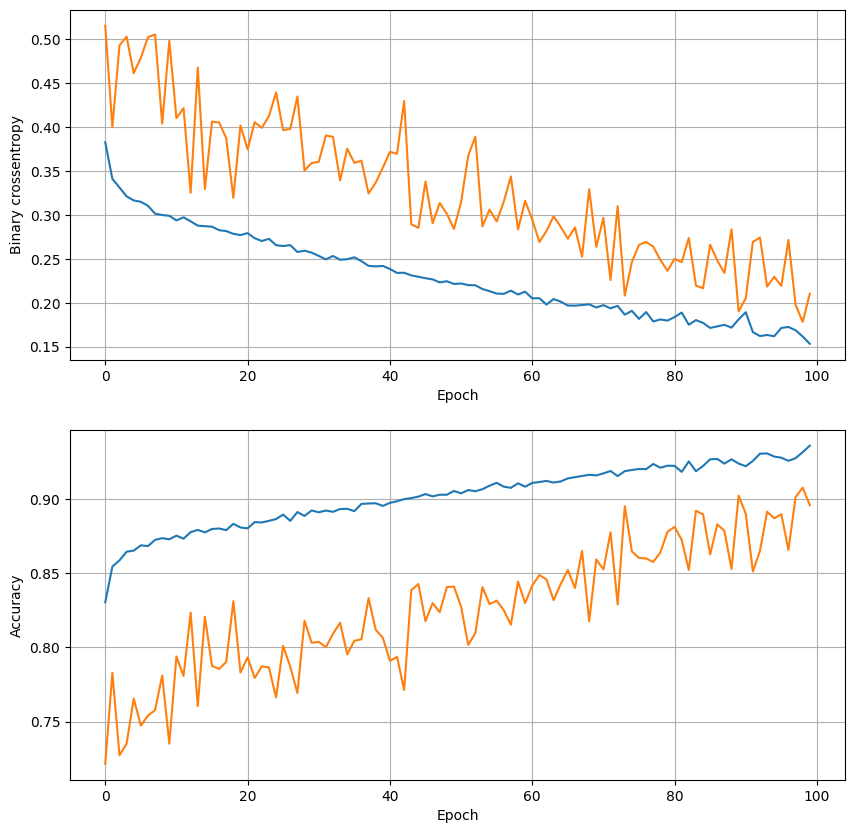

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8477 - loss: 0.8116
64 nodes, dropout 0, lr 0.01, batch size 128


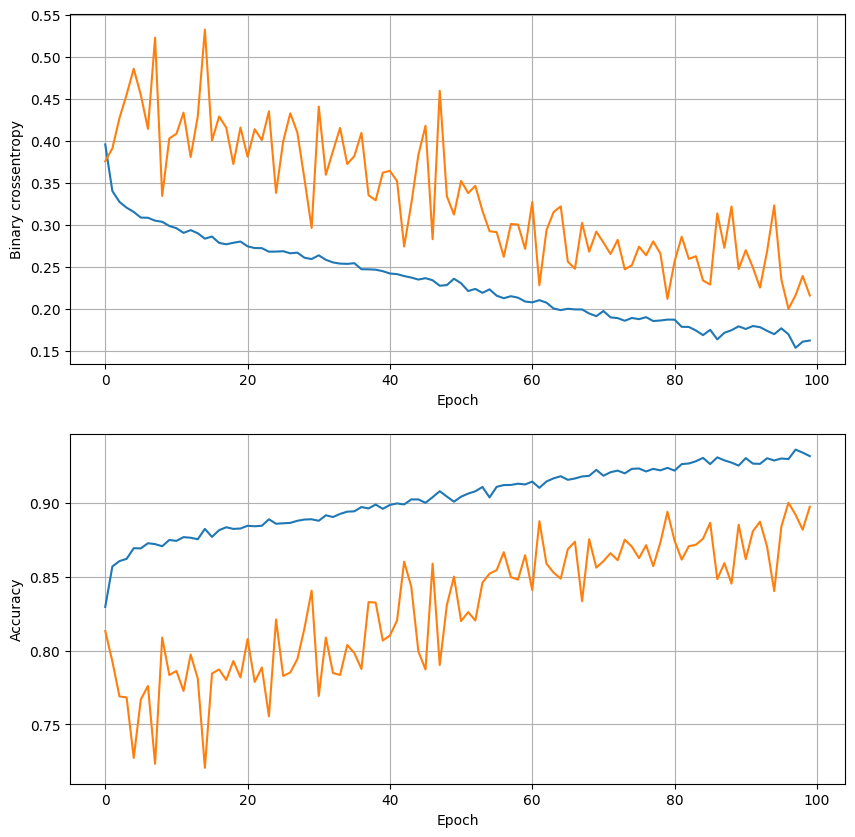

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.5747
64 nodes, dropout 0, lr 0.005, batch size 32


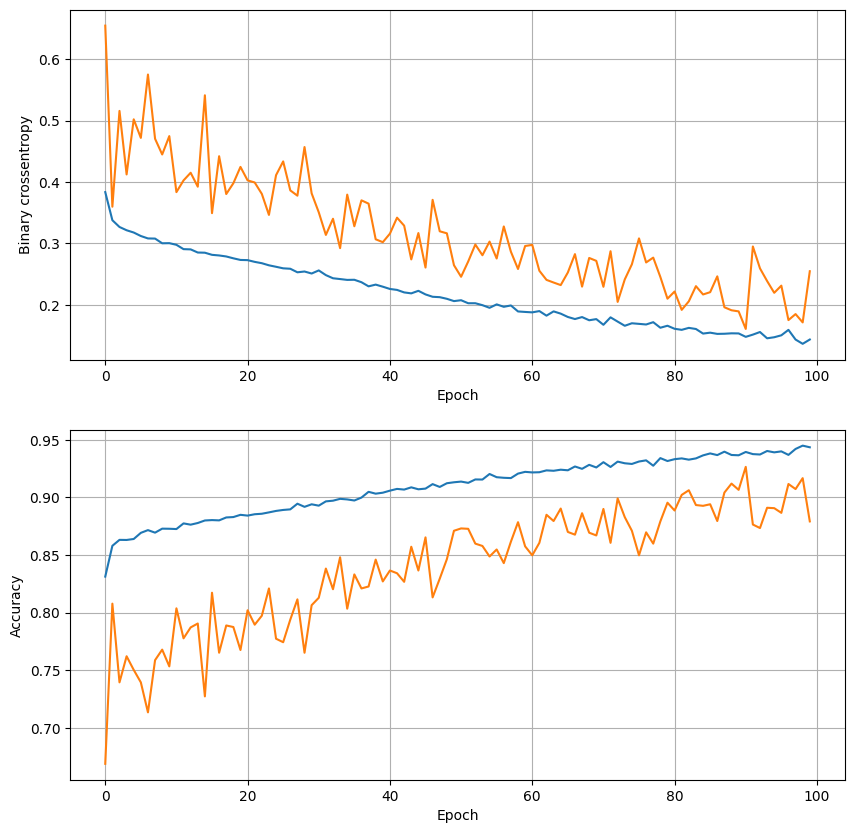

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8460 - loss: 0.8425
64 nodes, dropout 0, lr 0.005, batch size 64


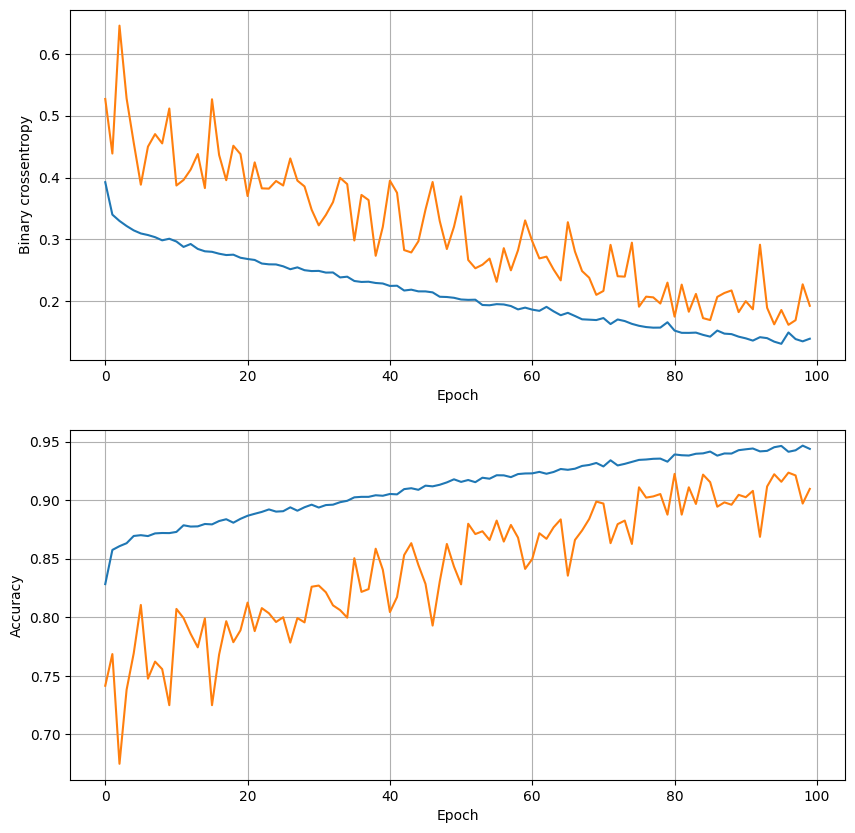

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8635 - loss: 0.6257
64 nodes, dropout 0, lr 0.005, batch size 128


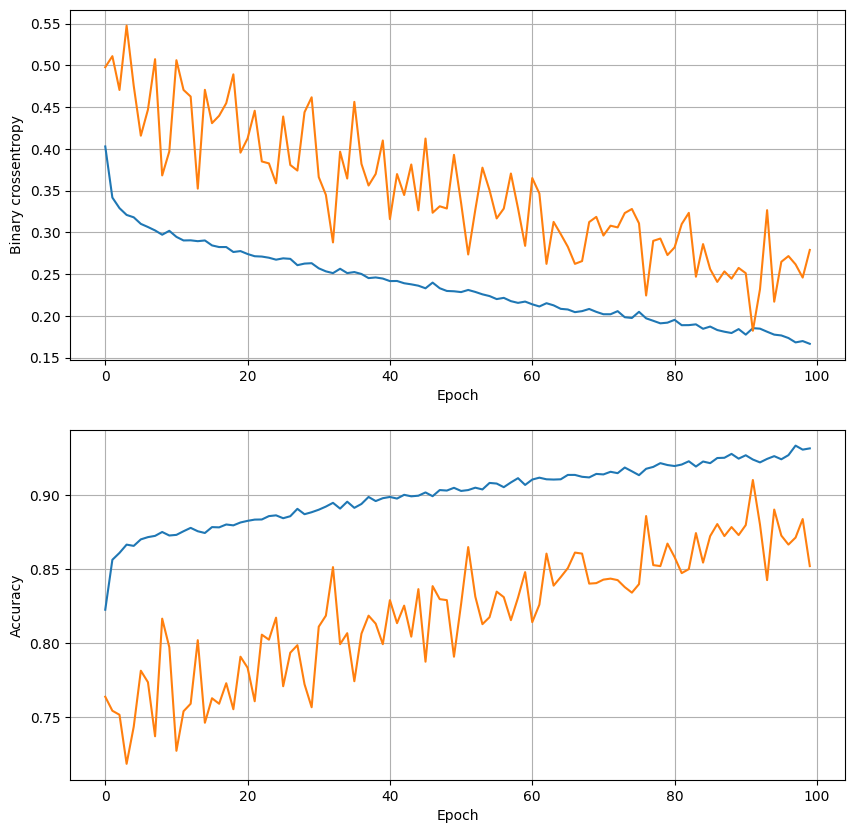

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8678 - loss: 0.4774
64 nodes, dropout 0, lr 0.001, batch size 32


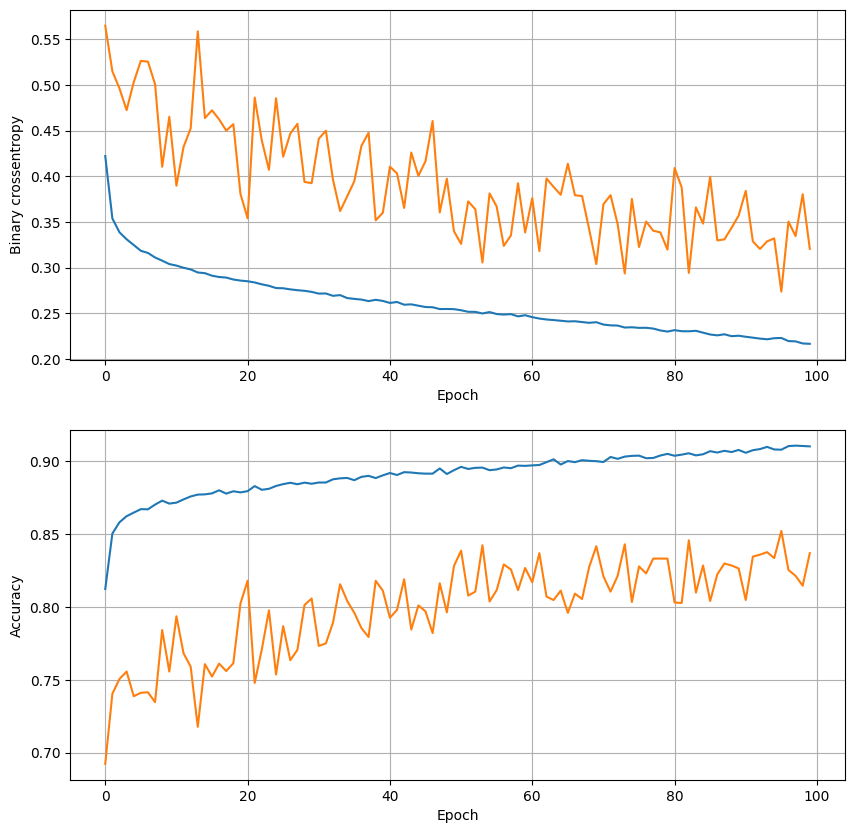

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8702 - loss: 0.3579
64 nodes, dropout 0, lr 0.001, batch size 64


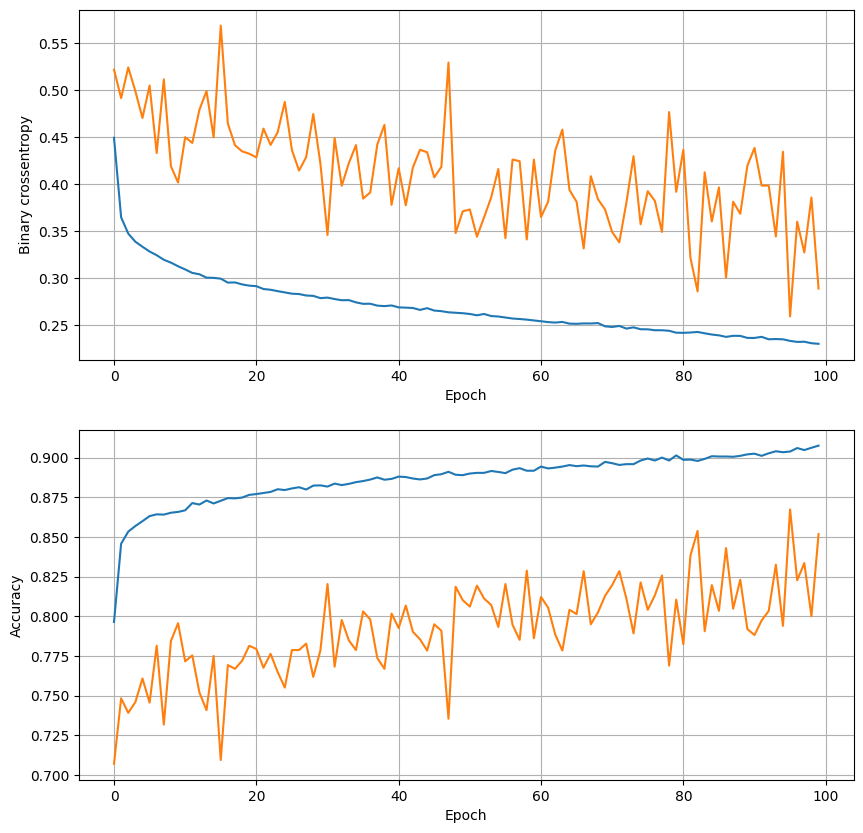

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8622 - loss: 0.3525
64 nodes, dropout 0, lr 0.001, batch size 128


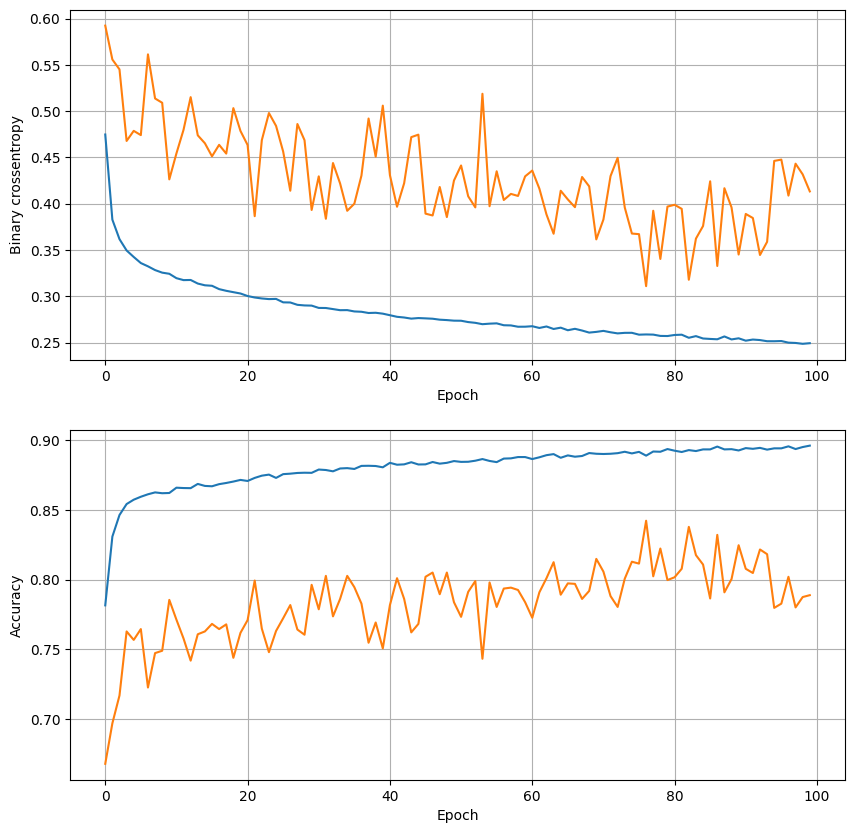

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8722 - loss: 0.3369
64 nodes, dropout 0.2, lr 0.01, batch size 32


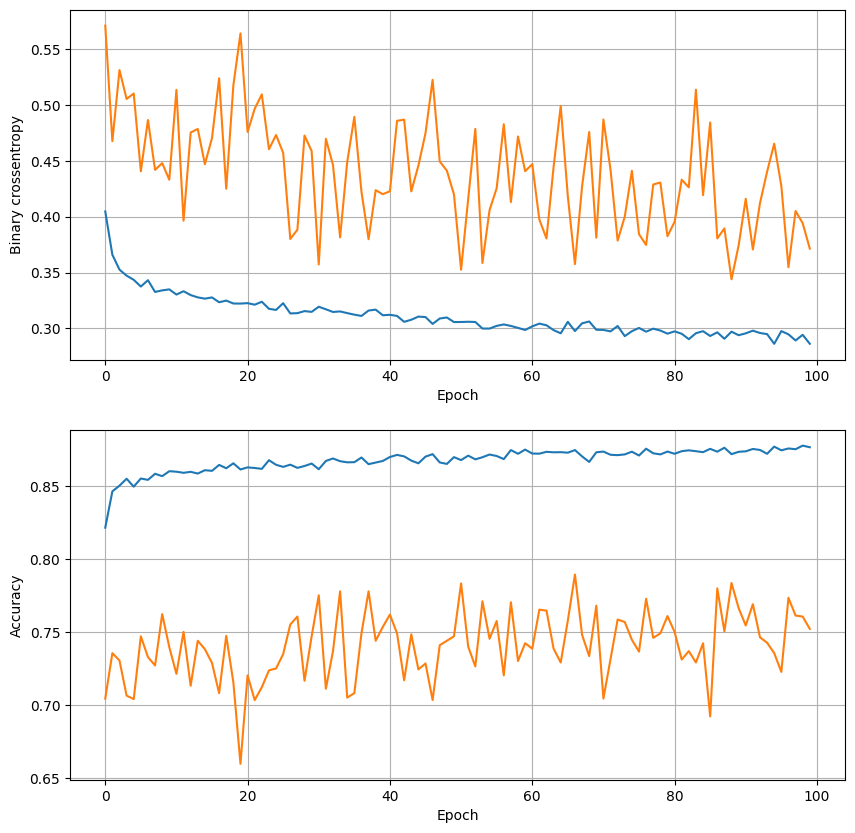

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8643 - loss: 0.3695
64 nodes, dropout 0.2, lr 0.01, batch size 64


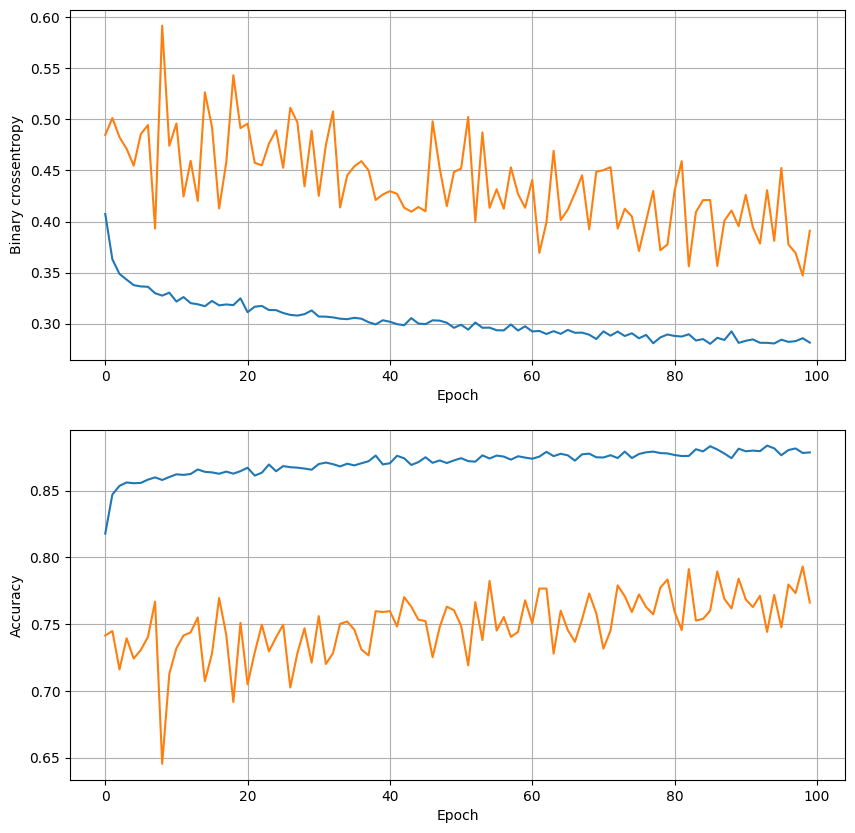

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8726 - loss: 0.3350
64 nodes, dropout 0.2, lr 0.01, batch size 128


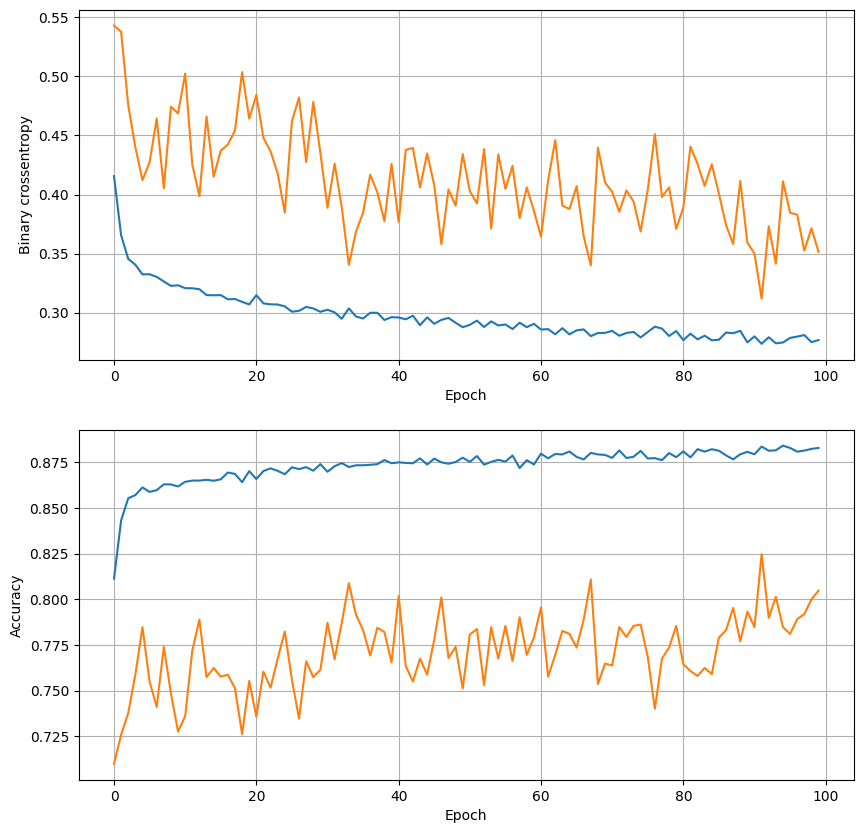

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8747 - loss: 0.3361
64 nodes, dropout 0.2, lr 0.005, batch size 32


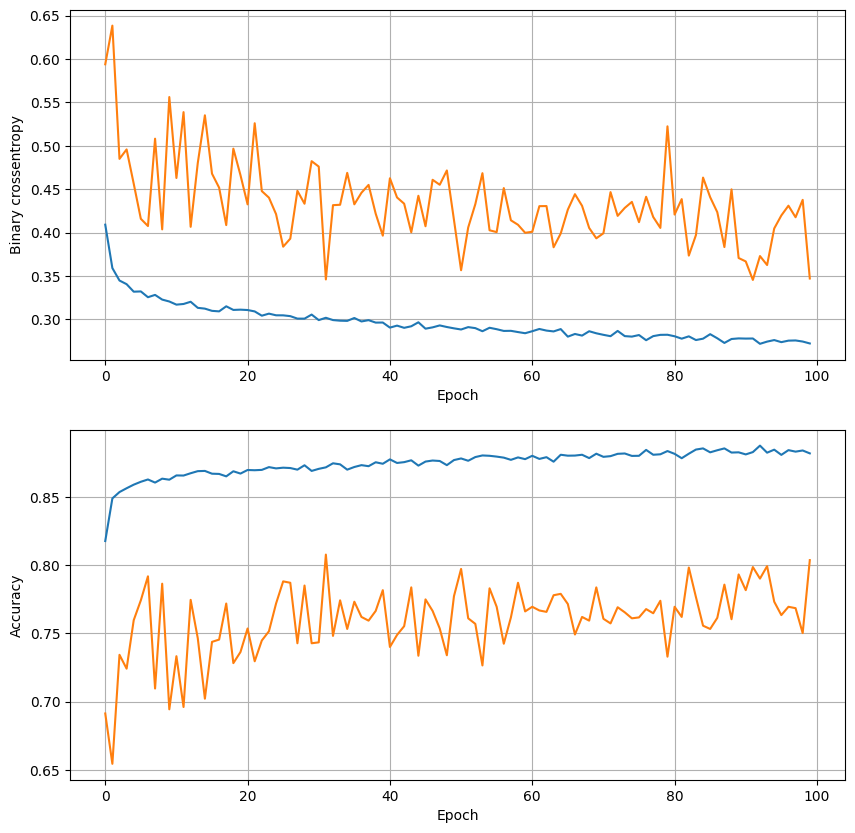

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8758 - loss: 0.3313
64 nodes, dropout 0.2, lr 0.005, batch size 64


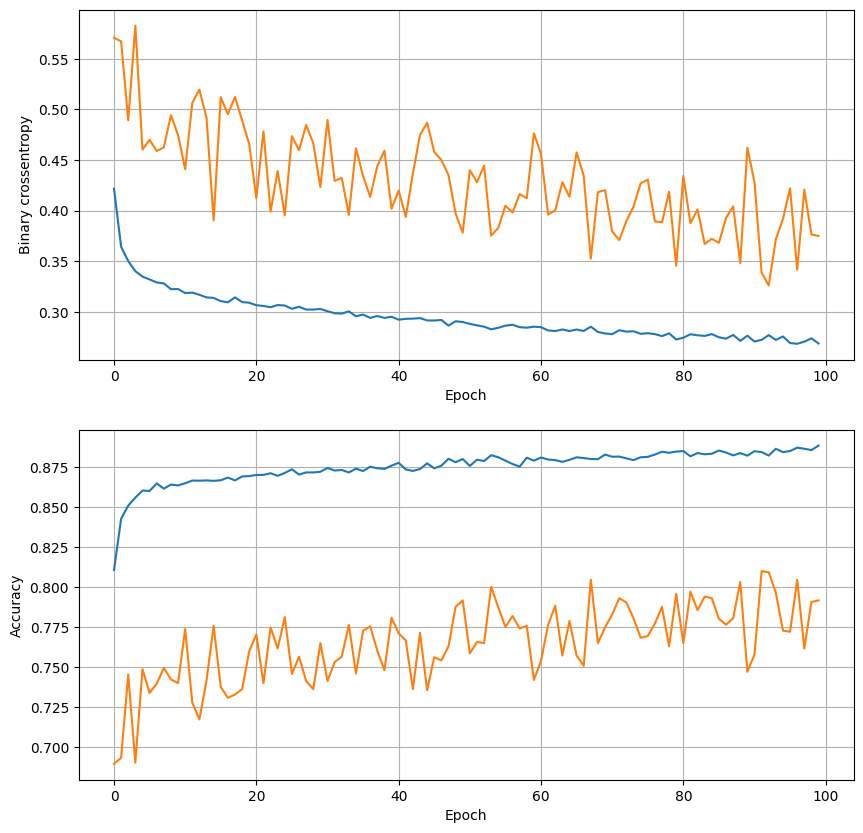

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8734 - loss: 0.3299
64 nodes, dropout 0.2, lr 0.005, batch size 128


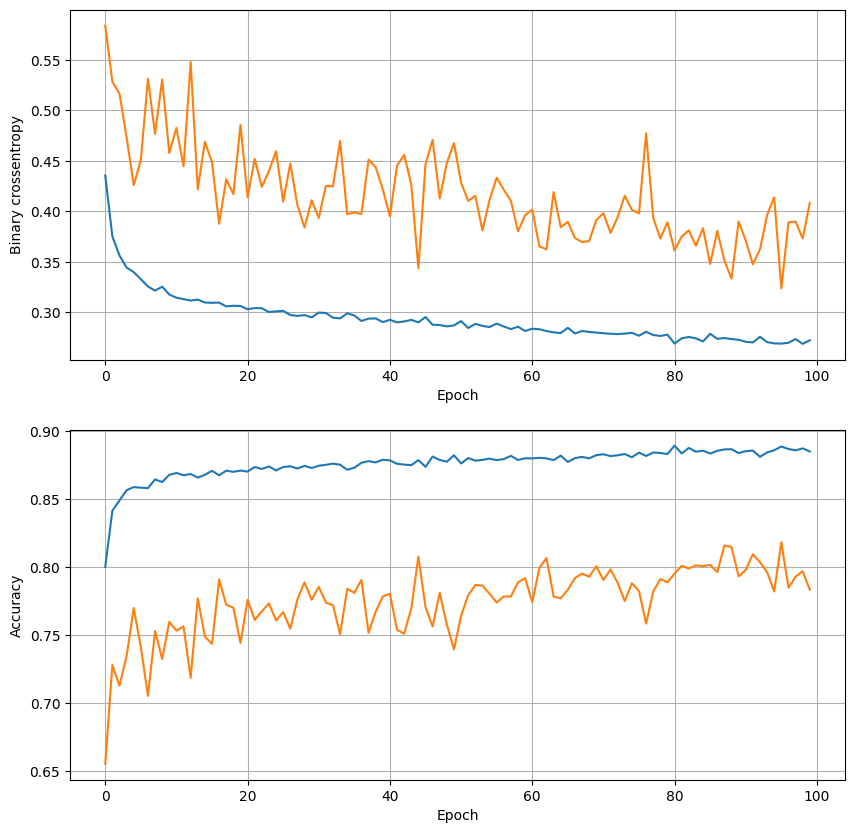

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8783 - loss: 0.3123
64 nodes, dropout 0.2, lr 0.001, batch size 32


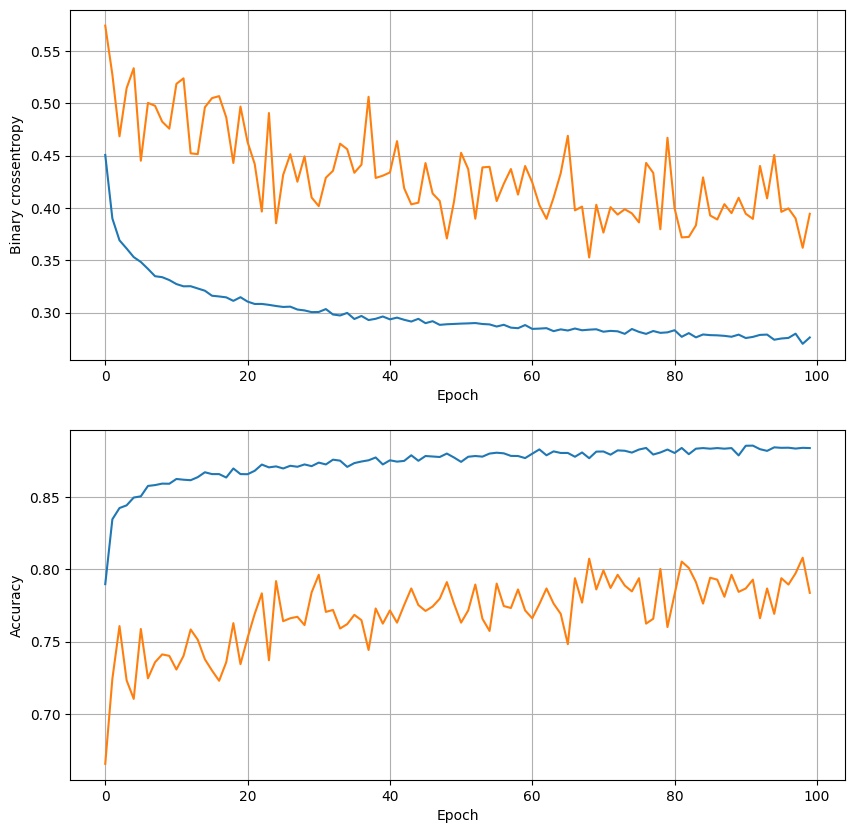

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8740 - loss: 0.3084
64 nodes, dropout 0.2, lr 0.001, batch size 64


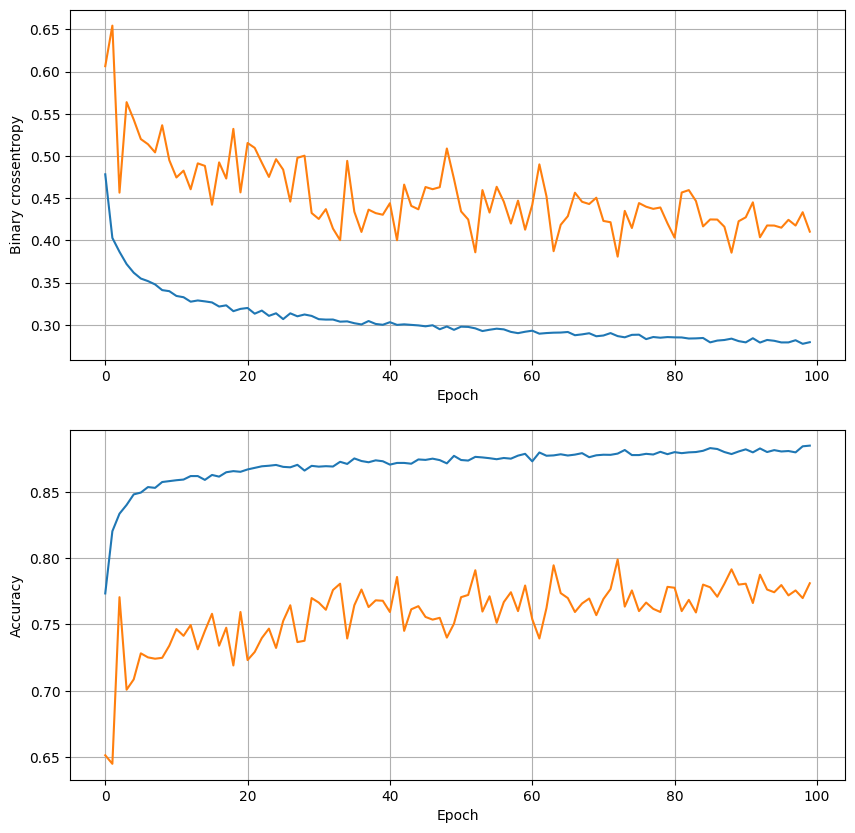

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8730 - loss: 0.3079
64 nodes, dropout 0.2, lr 0.001, batch size 128


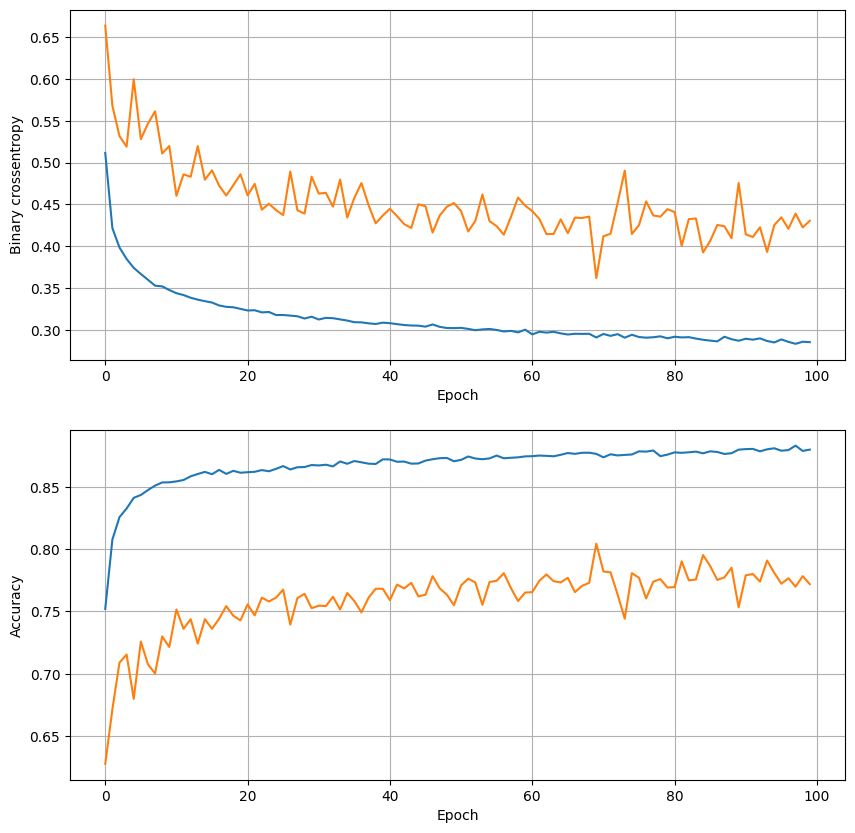

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.3050


In [56]:
least_val_loss = float('inf')
least_loss_model = None
#best_epoch = 0
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
        for batch_size in [32, 64, 128]:
          print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
          model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
          plot_history(history)
          val_loss = model.evaluate(X_valid, y_valid)[0] # Notice the [0] at the end used to eliminate error of comparing list with a float
          if val_loss < least_val_loss:
            least_val_loss = val_loss
            least_loss_model = model
            #best_epoch = history.epoch[-1]


In [57]:
#plot_history(history)
#plot_accuracy(history)
least_loss_model.predict(X_test)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[8.1399363e-01],
       [9.1709065e-01],
       [3.7381129e-04],
       ...,
       [4.7401765e-01],
       [9.7812176e-01],
       [7.7397692e-01]], dtype=float32)

In [61]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
#print(classification_report(y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [63]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1333
           1       0.87      0.93      0.90      2471

    accuracy                           0.86      3804
   macro avg       0.86      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804

